# Clustering data from three different cultivars and exploring key characterics

data = https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
Questions:
- What are the key features of each cluster?
- what are similarities?
- Can we guess type of grape based on charachteristacs?
  


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Part 1 | Import the data

In [4]:
df = pd.read_csv("wine-clustering.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
print(outliers)

     Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      False       False  False         False      False          False   
1      False       False  False         False      False          False   
2      False       False  False         False      False          False   
3      False       False  False         False      False          False   
4      False       False  False         False      False          False   
..       ...         ...    ...           ...        ...            ...   
173    False        True  False         False      False          False   
174    False       False  False         False      False          False   
175    False       False  False         False      False          False   
176    False       False  False         False      False          False   
177    False       False  False         False      False          False   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0         False         

## Missing values - No missing values

In [8]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Get summary statistics
print("\nSummary statistics:")
print(df.describe())

# Get dataset information
print("\nDataset information:")
df.info()


Missing values per column:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Summary statistics:
          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    

## Understand the features

## Clean the data

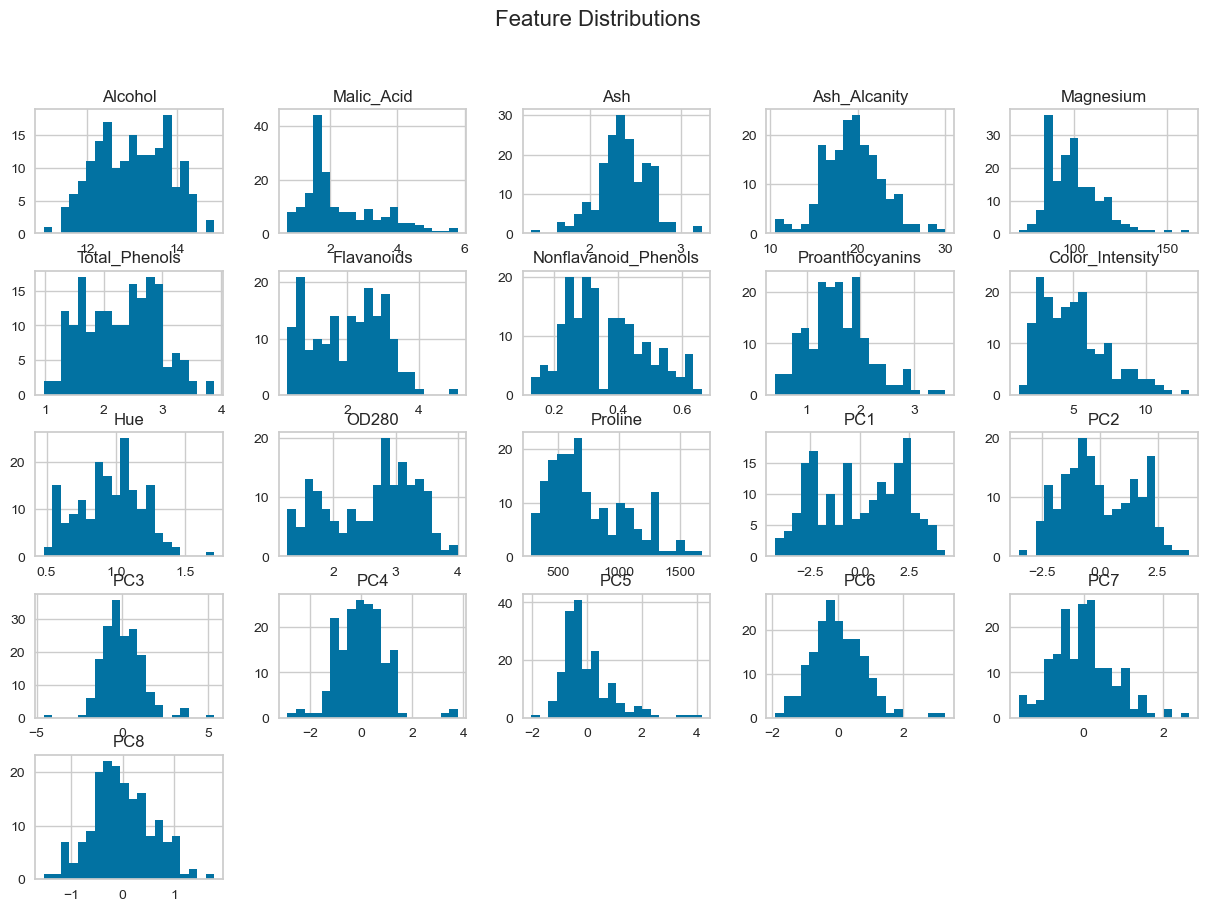

ValueError: could not convert string to float: 'premium'

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distributions
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Plot correlation heatmap
correlation_matrix = df.corr()

# Filter the correlation matrix to show only correlations >= 0.6 or <= -0.6
filtered_corr = correlation_matrix[(correlation_matrix >= 0.6) | (correlation_matrix <= -0.6)]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', mask=filtered_corr.isnull())
plt.title('Filtered Feature Correlation Heatmap (|corr| >= 0.6)', fontsize=16)
plt.show()


### features
Alcohol:
    Represents the alcohol content in the wine (% by volume).
    Alcohol levels influence the body, flavor, and warmth of the wine.

Malic_Acid:
    A type of organic acid found in wine, contributing to tartness.
    Higher levels can make the wine taste more acidic.
    
Ash:
    A measure of the inorganic residue remaining after the wine is burned.
    Includes minerals like potassium, calcium, and magnesium, influencing the wine's texture and balance.

Ash_Alcanity:
    The alkalinity of the ash, indicating the wine's buffering capacity.
    Related to the wine's pH stability and mineral content.    

Magnesium:
    The concentration of magnesium in the wine (measured in mg/L).
    Magnesium is an essential mineral that influences fermentation and the stability of the wine.

Total_Phenols:
    Total phenolic content, which contributes to the wine's antioxidant properties.
    Plays a significant role in flavor, structure, and aging potential.

Flavanoids:
    A subgroup of phenols influencing bitterness, astringency, and antioxidant properties.
    Higher flavanoid content often indicates more complex flavor profiles.

Nonflavanoid_Phenols:
    Phenolic compounds not part of the flavonoid group.
    Often influence the wine's bitterness and are more abundant in white wines.
    


Proanthocyanins:
    A class of polyphenols contributing to tannins and astringency in wine.
    Associated with the wine's texture and longevity.



In [13]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

## Scale the data

### 2.1 Plot the explained variance ratio

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [17]:
X = df.select_dtypes("number").copy()

In [18]:
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

In [19]:
pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

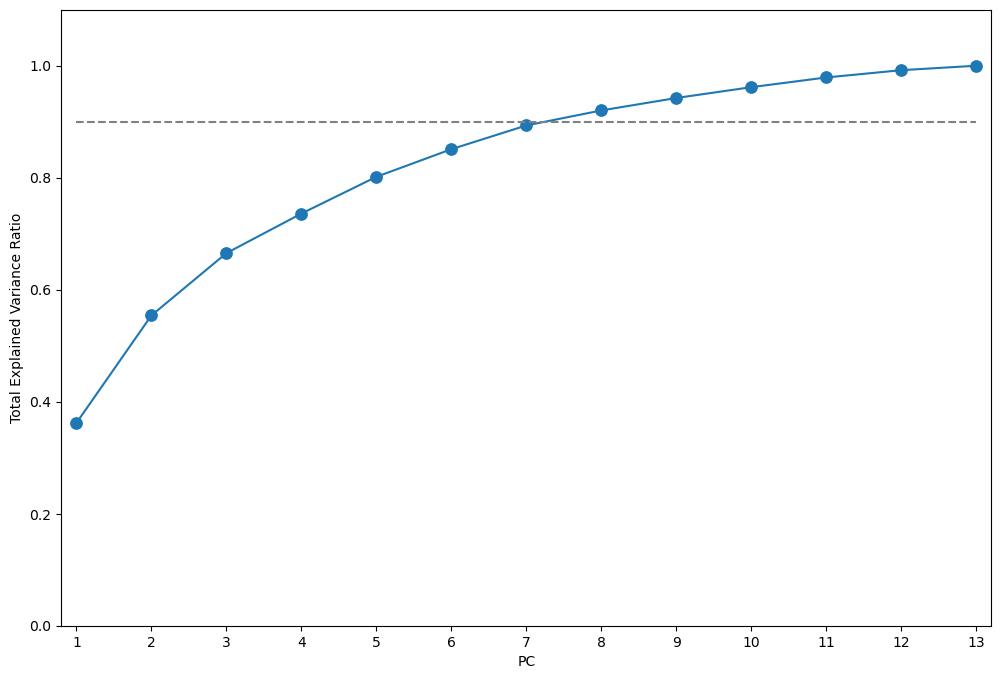

In [20]:
import numpy as np
import matplotlib.pyplot as plt
explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

In [21]:
pipe["pca"].explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [63]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'clusters'],
      dtype='object')

In [22]:
#Print the PCA in a nice way too se which columns contributes most in each PC
loadings = pipe["pca"].components_

for i, component in enumerate(loadings):
    feature_contrib = np.abs(component)
    top_contrib_features = np.argsort(feature_contrib)[::-1]
    print(f"Principal Component {i+1}:")
    for feature_idx in top_contrib_features:
        print(f"Feature {feature_idx}: {feature_contrib[feature_idx]}")
    print()
    

Principal Component 1:
Feature 6: 0.42293429671005944
Feature 5: 0.39466084506663035
Feature 11: 0.37616741073871296
Feature 8: 0.3134294883076887
Feature 7: 0.29853310295471536
Feature 10: 0.29671456358638126
Feature 12: 0.28675222689680535
Feature 1: 0.24518758025722076
Feature 3: 0.23932040548753497
Feature 0: 0.14432939540601164
Feature 4: 0.14199204195298756
Feature 9: 0.08861670472472269
Feature 2: 0.002051061444370689

Principal Component 2:
Feature 9: 0.5299956720700439
Feature 0: 0.4836515478172144
Feature 12: 0.36490283179808214
Feature 2: 0.31606881402531484
Feature 4: 0.29963400323786166
Feature 10: 0.27923514792428206
Feature 1: 0.22493093462784464
Feature 11: 0.1644961928357848
Feature 5: 0.06503951181927932
Feature 8: 0.0393017222897324
Feature 7: 0.02877948811298678
Feature 3: 0.010590502288191453
Feature 6: 0.0033598121003079757

Principal Component 3:
Feature 2: 0.626223900869347
Feature 3: 0.6120803499457818
Feature 0: 0.20738262411635627
Feature 7: 0.170368162359649

### Part 3 | Elbow method & K-means

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

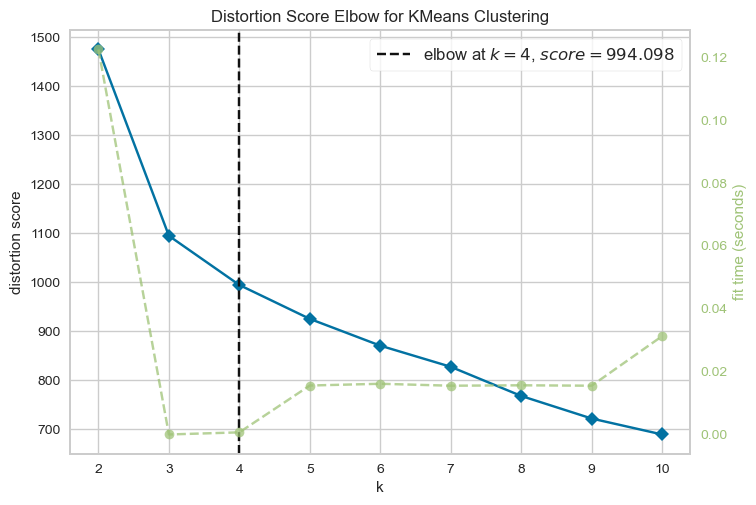

In [25]:
#Visaulize how many clusters you should start with , eg k value
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KElbowVisualizer(KMeans(n_init=10))
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)
pipe[2].show(outpath="elbow_plot.png")


In [26]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 1.3.1 Finilize the pipeline

In [28]:
#Visaulize how many clusters you should start with , eg k value
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(n_init=10, n_clusters=3)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=3, n_init=10))])

### Part 4 | Create cluster labels and add them to the original DataFrame

In [30]:
values = pipe[:2].transform(X)
pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df = df.join(pd.DataFrame(values, columns=pca_labels))

df['clusters'] = pipe['kmeans'].labels_

df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,...,Proline,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,...,1065,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,1050,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,1185,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,1480,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,735,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,...,740,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,...,750,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,...,835,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,...,840,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,1


In [31]:
loadings = pipe["pca"].components_

for i, component in enumerate(loadings):
    feature_contrib = np.abs(component)
    top_contrib_features = np.argsort(feature_contrib)[::-1]
    print(f"Principal Component {i+1}:")
    for feature_idx in top_contrib_features:
        print(f"Feature {feature_idx}: {feature_contrib[feature_idx]}")
    print()

Principal Component 1:
Feature 6: 0.42293429671005944
Feature 5: 0.39466084506663035
Feature 11: 0.37616741073871296
Feature 8: 0.3134294883076887
Feature 7: 0.29853310295471536
Feature 10: 0.29671456358638126
Feature 12: 0.28675222689680535
Feature 1: 0.24518758025722076
Feature 3: 0.23932040548753497
Feature 0: 0.14432939540601164
Feature 4: 0.14199204195298756
Feature 9: 0.08861670472472269
Feature 2: 0.002051061444370689

Principal Component 2:
Feature 9: 0.5299956720700439
Feature 0: 0.4836515478172144
Feature 12: 0.36490283179808214
Feature 2: 0.31606881402531484
Feature 4: 0.29963400323786166
Feature 10: 0.27923514792428206
Feature 1: 0.22493093462784464
Feature 11: 0.1644961928357848
Feature 5: 0.06503951181927932
Feature 8: 0.0393017222897324
Feature 7: 0.02877948811298678
Feature 3: 0.010590502288191453
Feature 6: 0.0033598121003079757

Principal Component 3:
Feature 2: 0.626223900869347
Feature 3: 0.6120803499457818
Feature 0: 0.20738262411635627
Feature 7: 0.170368162359649

In [32]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,...,Proline,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,...,1065,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,1050,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,1185,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,1480,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,735,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,...,740,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,...,750,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,...,835,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,...,840,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,1


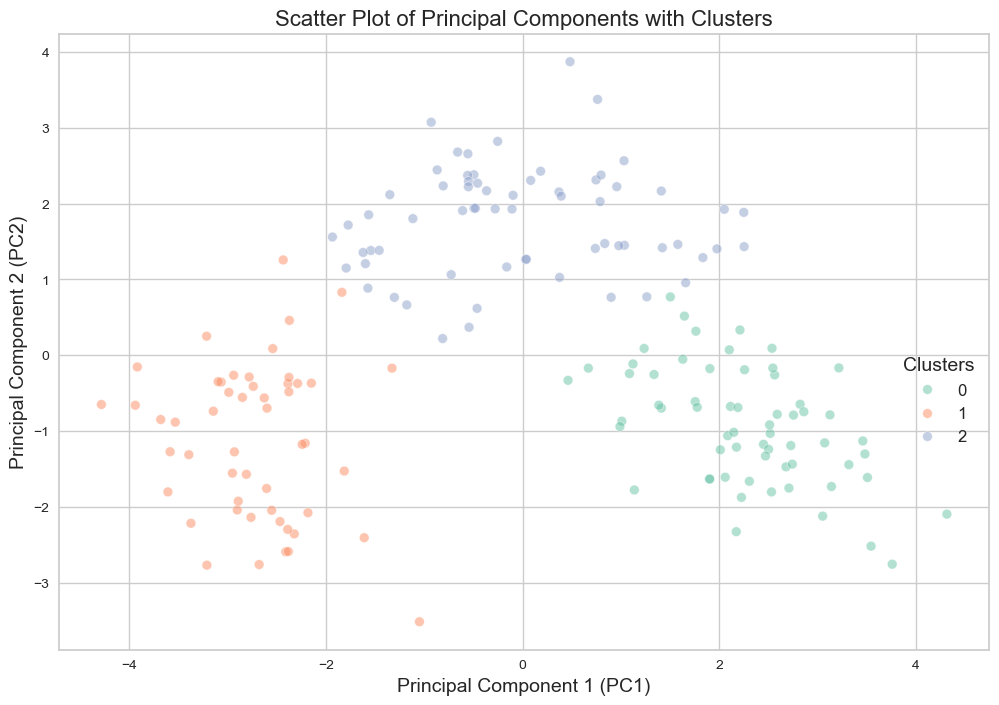

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example plotting code
plt.figure(figsize=(12, 8))

# Scatter plot
g = sns.scatterplot(data=df, x="PC1", y="PC2", hue="clusters", alpha=0.5, palette='Set2')

# Adding labels and title for clarity
plt.title("Scatter Plot of Principal Components with Clusters", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14)

# Move legend outside
plt.legend(
    title="Clusters", 
    fontsize=12, 
    title_fontsize=14, 
    loc="upper right", 
    bbox_to_anchor=(1, 0.5)  # Position legend outside plot
)

# Save the plot
plt.savefig("Scatterplot.png", bbox_inches='tight')  # Adjust bounding box to include the legend
plt.show()


## Renaming the clusters 

In [35]:
# Define the mapping
cluster_mapping = {
    0: "premium",
    1: "normal",
    2: "budget"
}

# Rename the values in the 'clusters' column
df["clusters"] = df["clusters"].map(cluster_mapping)

# Check the updated DataFrame
print(df["clusters"].value_counts())


clusters
budget     65
premium    62
normal     51
Name: count, dtype: int64


# Understanding the clusters

In [37]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

## How large are the clusters

C:\Users\andre\AppData\Local\Temp\ipykernel_8592\1836219782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clusters', data=df, palette='Set2')


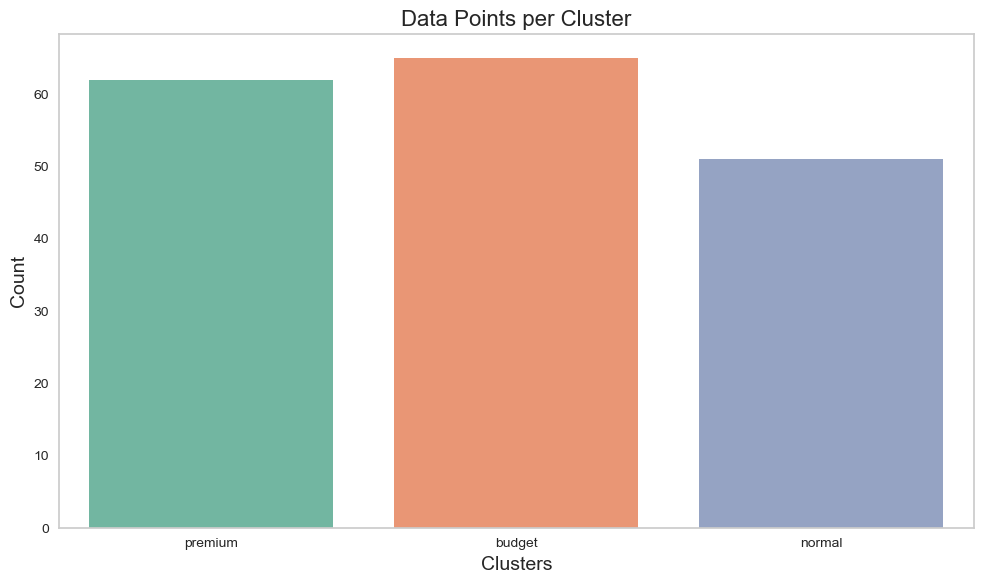

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot with customizations
plt.figure(figsize=(10, 6))
sns.countplot(x='clusters', data=df, palette='Set2')

# Add title
plt.title("Data Points per Cluster", fontsize=16)

# Remove grid
plt.grid(False)

# Add labels for clarity
plt.xlabel("Clusters", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.tight_layout()
plt.savefig("datapoints_per_cluster.png")
plt.show()



## Distribution of features between clusters

In [41]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables
var_list = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
            'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
            'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

# Loop through each variable to create separate bar plots
for i in var_list:
    plt.figure(figsize=(8, 6))
    
    # Create a bar plot for the variable
    g = sns.barplot(data=df, x="clusters", y=i, palette='Set2')
    
    # Add title and labels
    plt.title(i, fontsize=16)
    plt.xlabel("Clusters", fontsize=14)
    plt.ylabel(i, fontsize=14)
    
    # Save the plot as a PNG file
    filename = f"Barplot_{i}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.close()  # Close the plot to avoid overlapping figures


C:\Users\andre\AppData\Local\Temp\ipykernel_8592\3242082096.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=df, x="clusters", y=i, palette='Set2')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\3242082096.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=df, x="clusters", y=i, palette='Set2')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\3242082096.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=df, x="clusters", y=i, palette='Set2')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\3242082096.py:1

### Get summerized means for all features in each cluster

Cluster 0 budget top features: 
- NIL

Cluster 1 AKA as Normal:
- Malic_acid
- Ash_alcanity
- Non_flavonoid
- color intensity

Cluster 2 top feauters Premium:
- Alcohol
- Ash
- Magnesium
- Total_phenols
- flavanoids
- Proanthocyanins
- OD280
- Proline 

## Top five contributors to wine quality comparsion

C:\Users\andre\AppData\Local\Temp\ipykernel_8592\4015202936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=df, x="clusters", y=i, ax=ax,palette='Set2')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\4015202936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=df, x="clusters", y=i, ax=ax,palette='Set2')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\4015202936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=df, x="clusters", y=i, ax=ax,palette='Set2')
C:\Users\andre\AppData\Local\Temp\ipykernel_85

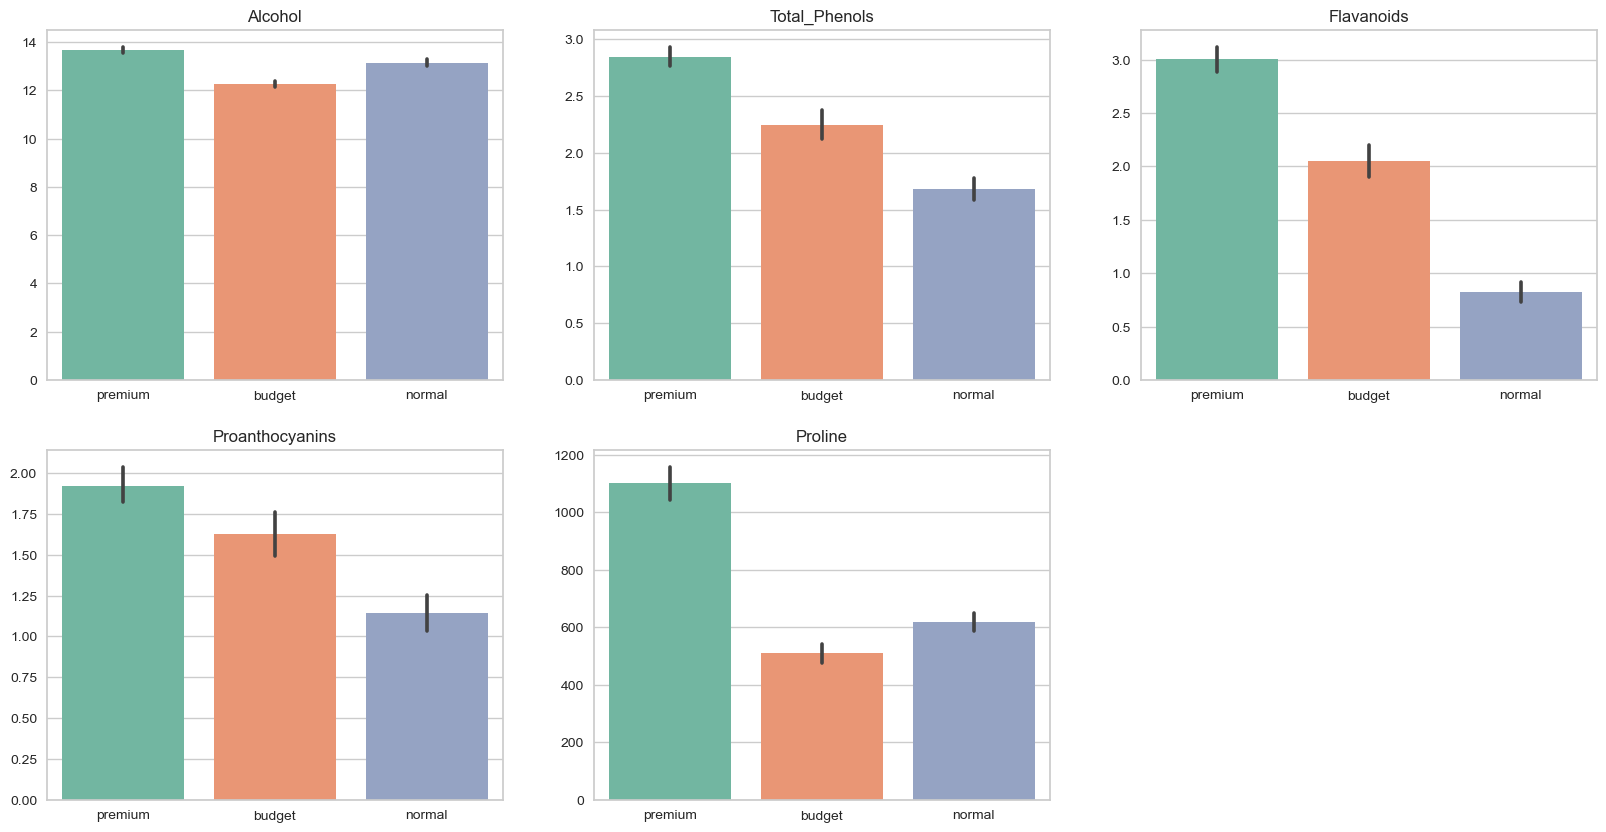

In [44]:
import math

var_list = ['Alcohol','Total_Phenols', 'Flavanoids',
       'Proanthocyanins','Proline']

rows= math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20, 5*rows))
for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x="clusters", y=i, ax=ax,palette='Set2')
    ax.set(xlabel='', ylabel='', title=i)

for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()






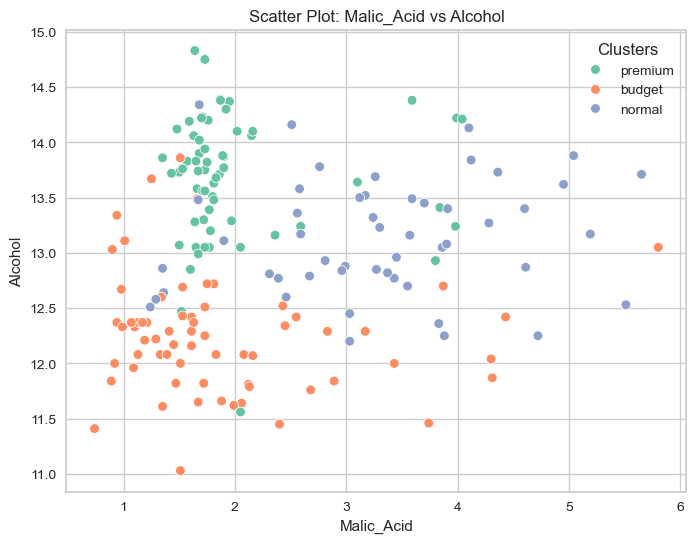

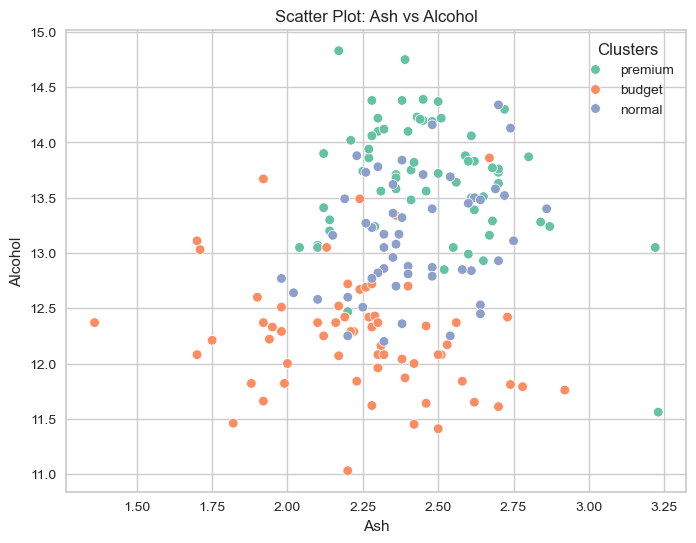

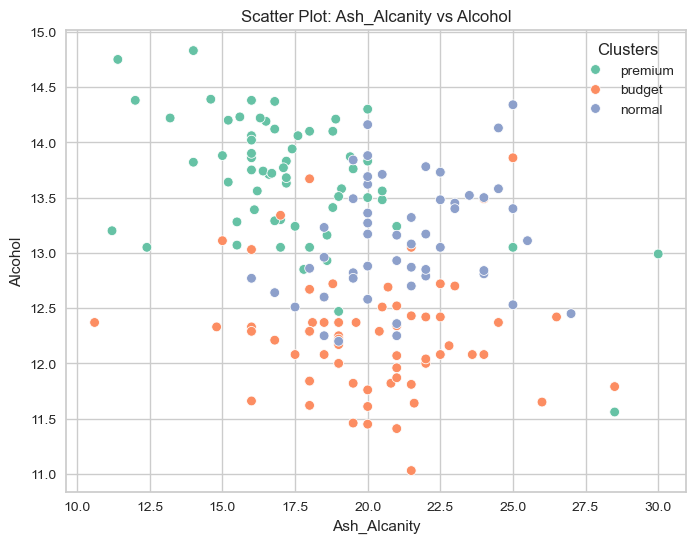

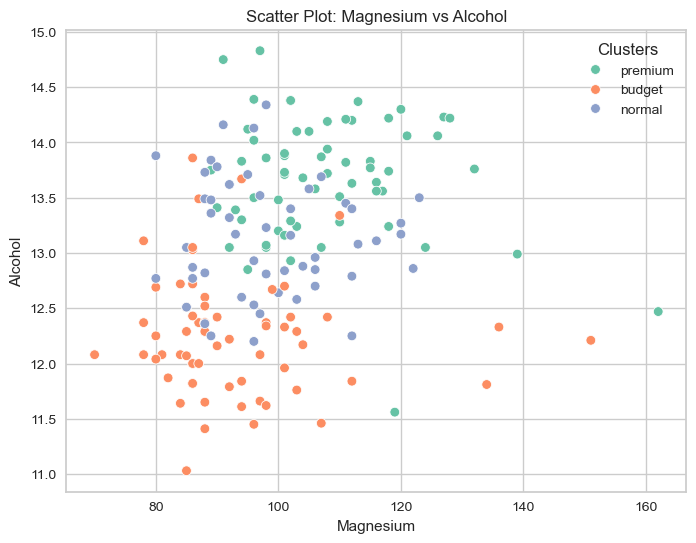

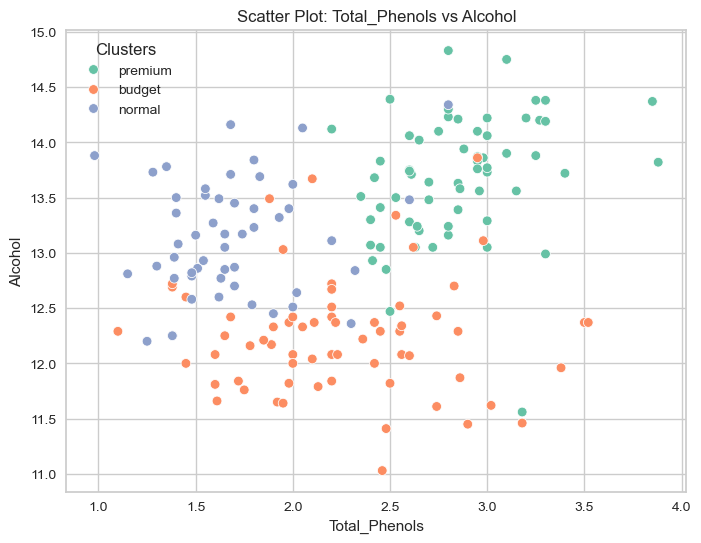

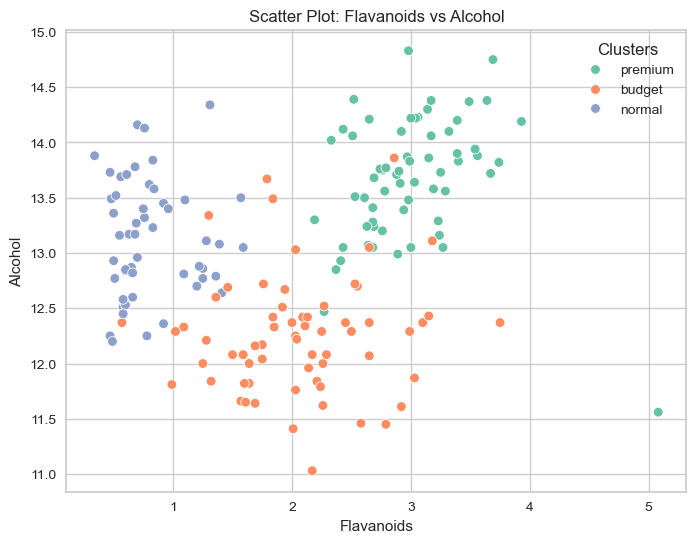

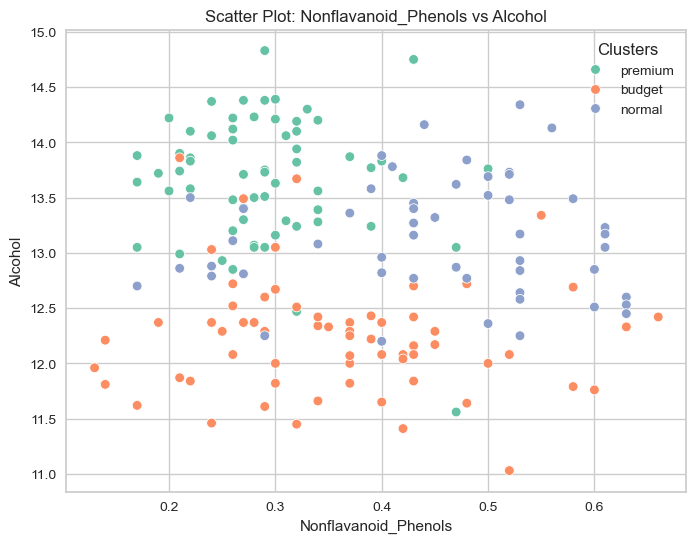

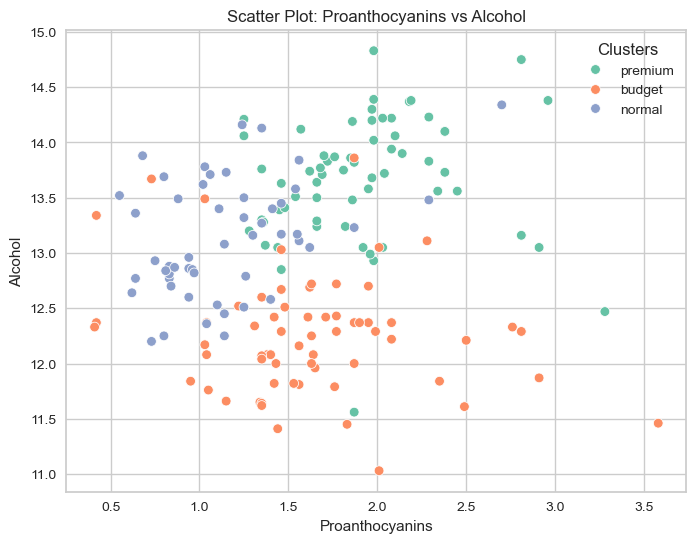

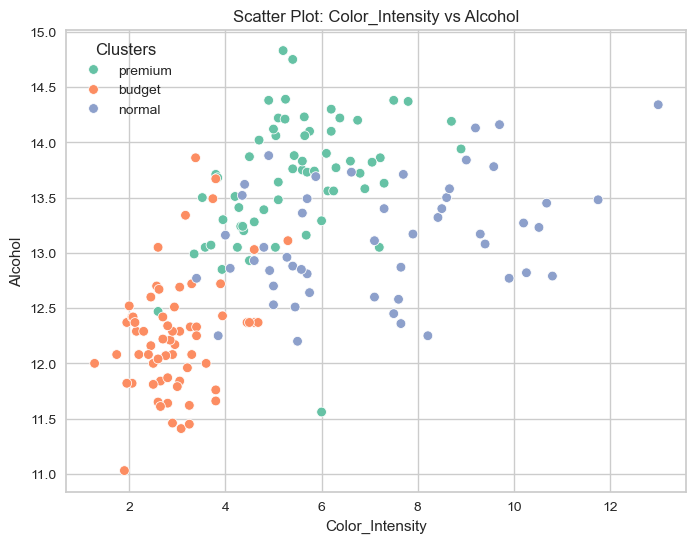

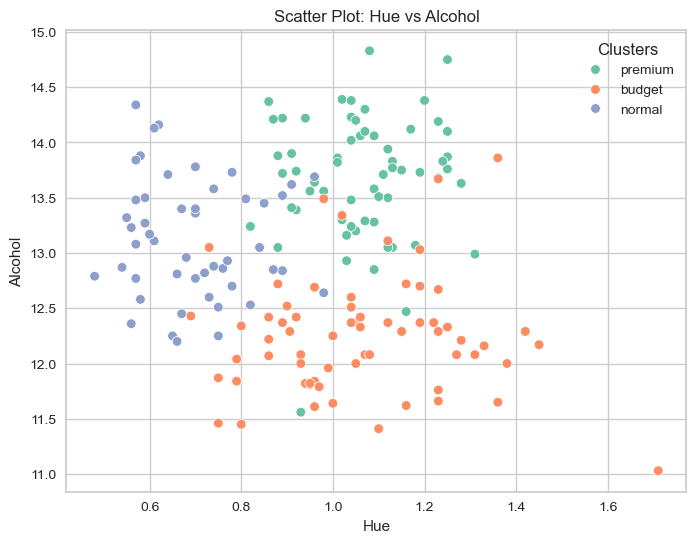

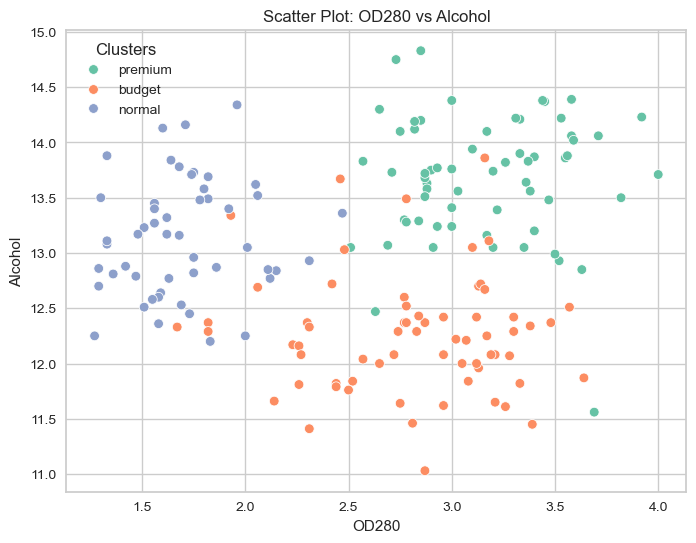

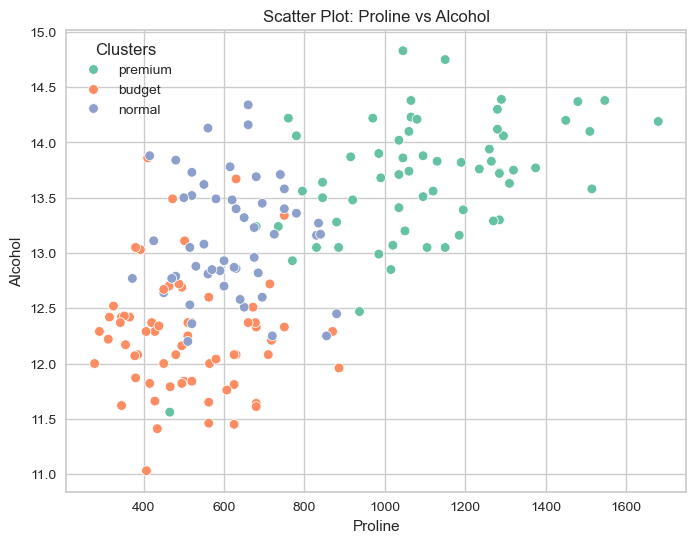

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the first column is clusters and Alcohol is the target for scatterplots
columns = df.columns[:13]  # Selecting the first 13 columns

for column in columns:
    if column != "Alcohol":  # Avoid making a scatterplot with itself
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=column, y="Alcohol", hue="clusters", palette="Set2")
        plt.title(f"Scatter Plot: {column} vs Alcohol")
        plt.xlabel(column)
        plt.ylabel("Alcohol")
        plt.legend(title="Clusters")
        plt.show()


<Axes: xlabel='Proline', ylabel='Alcohol'>

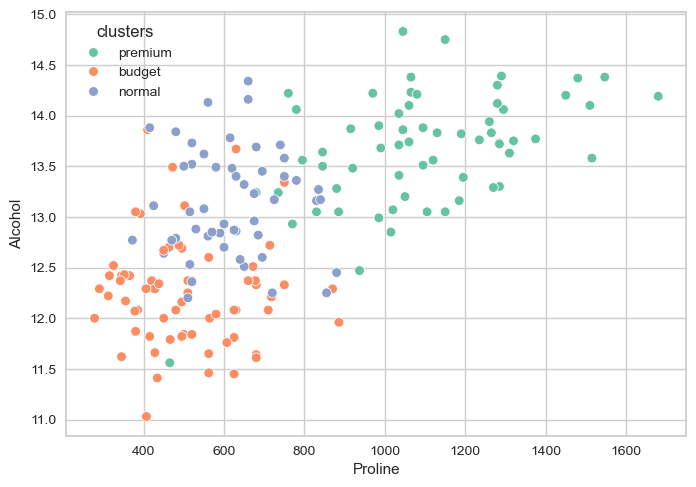

In [69]:
sns.scatterplot(data=df, x="Proline", y="Alcohol", hue="clusters", palette = "Set2")

Features contributing most to cluster separation:
Proline                 98590.895229
Magnesium                  58.930766
PC1                         6.251981
Color_Intensity             4.581124
Ash_Alcanity                3.737362
PC2                         2.624742
Flavanoids                  1.199341
Malic_Acid                  0.618707
OD280                       0.584283
Alcohol                     0.517927
Total_Phenols               0.338634
Proanthocyanins             0.153337
Hue                         0.046163
PC3                         0.045467
PC6                         0.037219
Ash                         0.015395
PC4                         0.014341
PC5                         0.014311
Nonflavanoid_Phenols        0.006458
PC7                         0.003165
PC8                         0.000501
dtype: float64


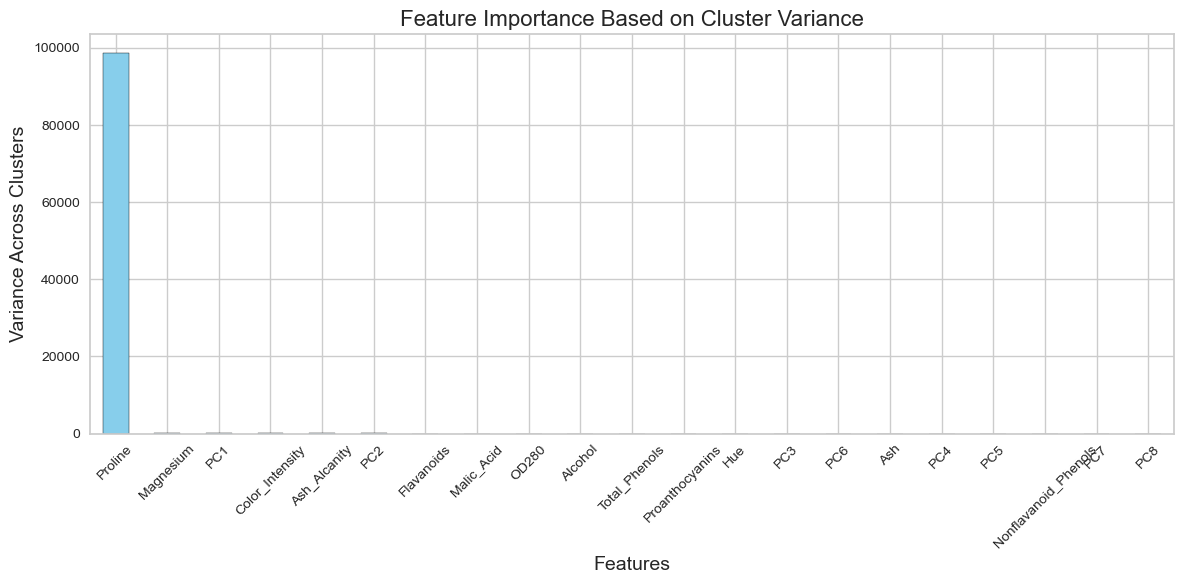

In [77]:
# Compute mean values of features for each cluster
cluster_means = df.groupby('clusters').mean()

# Compute the variance of feature means across clusters
feature_variances = cluster_means.var(axis=0)

# Sort features by variance
important_features = feature_variances.sort_values(ascending=False)

# Display features contributing the most to cluster separation
print("Features contributing most to cluster separation:")
print(important_features)

# Visualize the feature variances
import matplotlib.pyplot as plt
important_features.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Feature Importance Based on Cluster Variance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Variance Across Clusters', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Importances from Random Forest:
PC2                     0.174200
PC1                     0.142838
Proline                 0.141079
Flavanoids              0.105071
Color_Intensity         0.082178
OD280                   0.080013
Alcohol                 0.069016
Hue                     0.045814
Total_Phenols           0.040289
Proanthocyanins         0.026985
Malic_Acid              0.021719
Magnesium               0.017947
Ash_Alcanity            0.017908
Nonflavanoid_Phenols    0.009583
Ash                     0.005778
PC4                     0.004866
PC8                     0.003545
PC3                     0.003229
PC6                     0.003103
PC7                     0.002741
PC5                     0.002098
dtype: float64


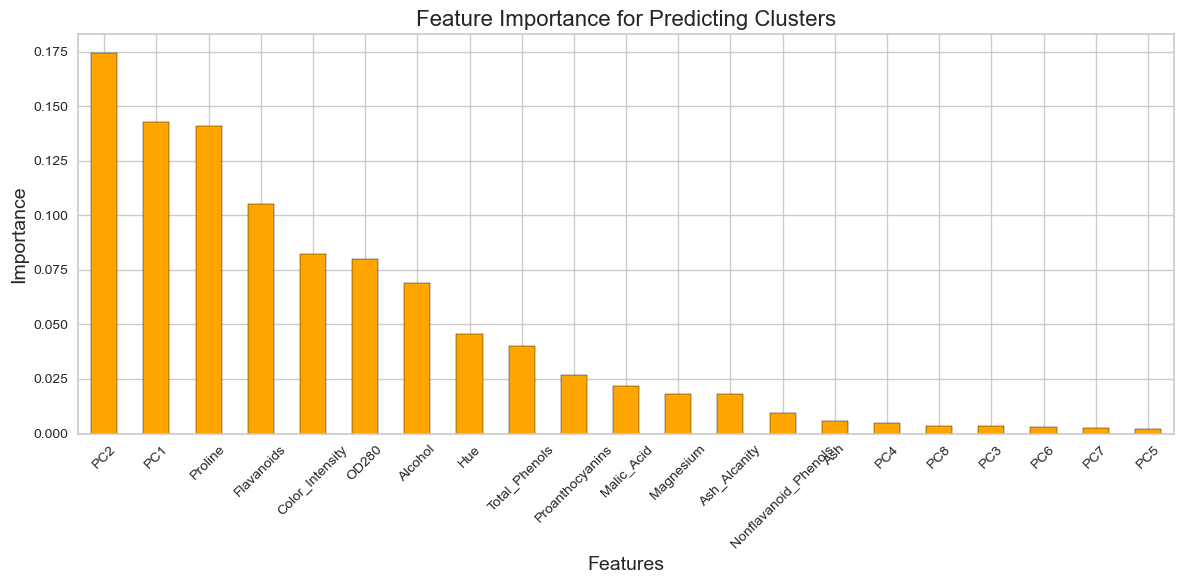

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data for classification
X = df.iloc[:, :-1]  # Exclude cluster labels
y = df['clusters']   # Cluster labels as the target

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importances
print("Feature Importances from Random Forest:")
print(feature_importances)

# Visualize feature importances
feature_importances.plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
plt.title('Feature Importance for Predicting Clusters', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, and 'clusters' is the column for cluster labels
features = df.columns[:13]  # Select only the first 13 columns

# Define the palette
palette = sns.color_palette("Set2", n_colors=len(df['clusters'].unique()))

# Plot KDEs for the first 13 features
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # KDE plot for each cluster
    for i, cluster in enumerate(df['clusters'].unique()):
        sns.kdeplot(
            data=df[df['clusters'] == cluster],
            x=feature,
            label=f'Cluster: {cluster}',
            fill=True,  # Optional: fills the area under the curve
            alpha=0.5,  # Transparency for overlapping curves
            color=palette[i]  # Assign color from the palette
        )
    
    # Add title and labels
    plt.title(f'KDE Plot of {feature} by Cluster', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title="Clusters", fontsize=12, title_fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save the plot as a PNG file
    filename = f"KDE_{feature}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.close()  # Close the plot to avoid overlapping figures



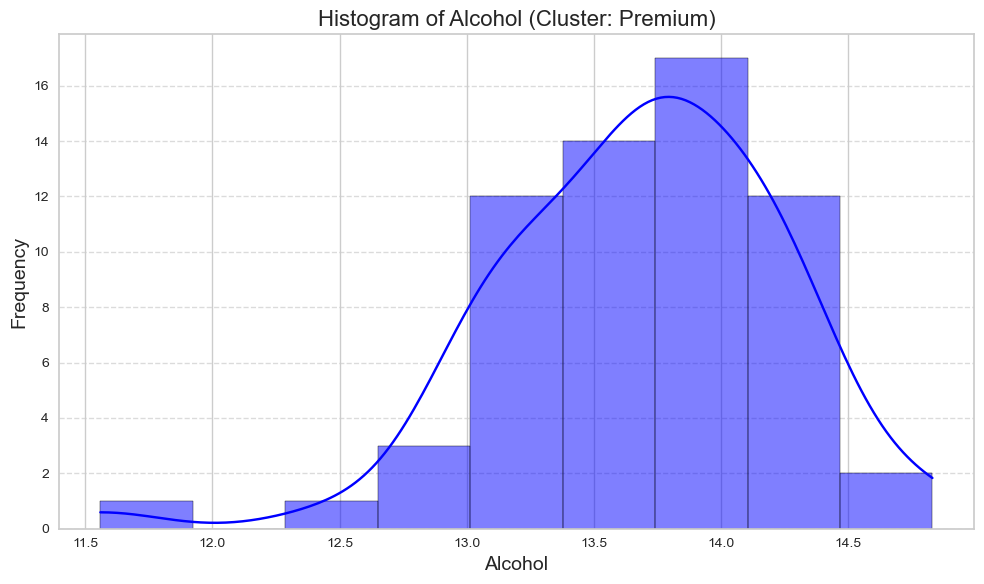

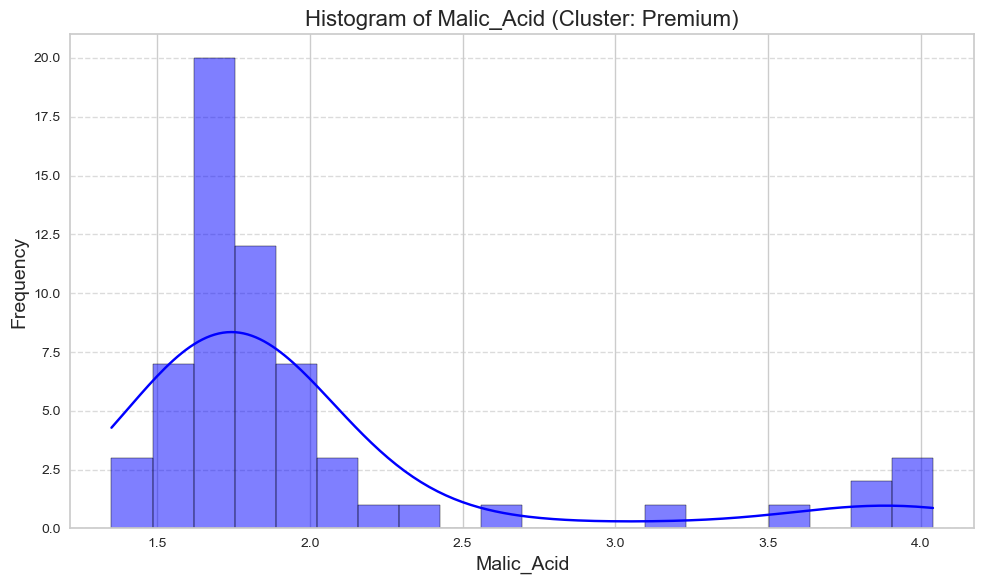

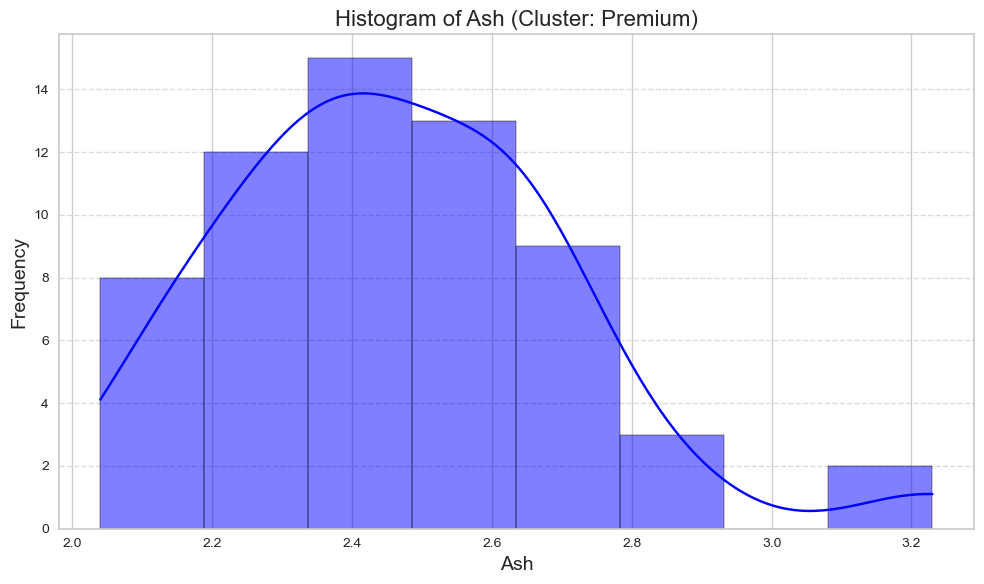

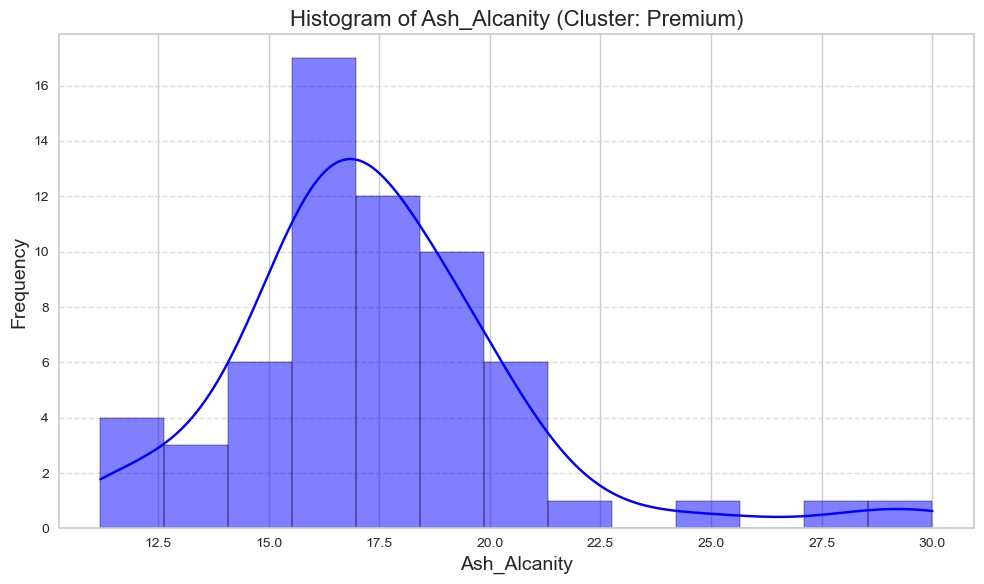

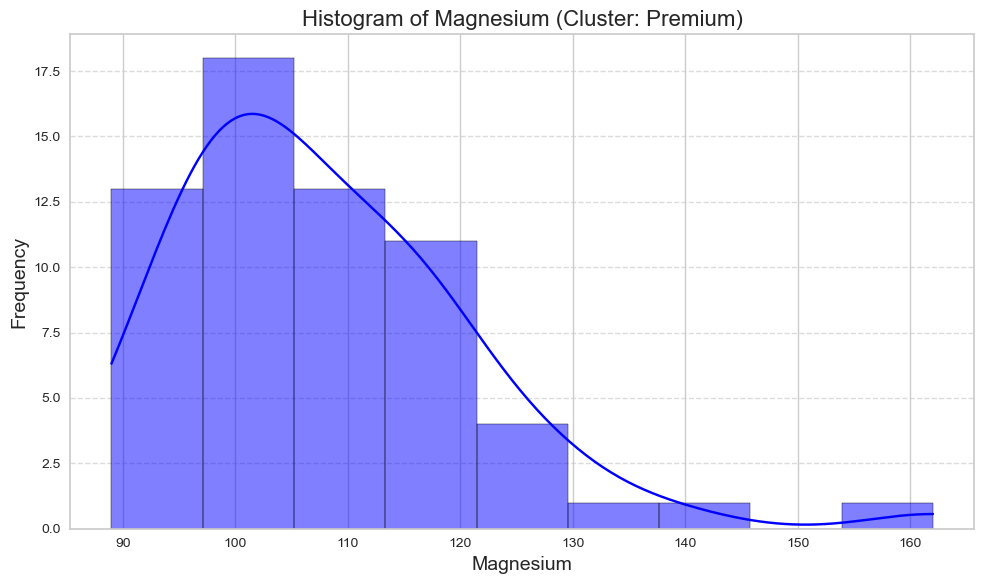

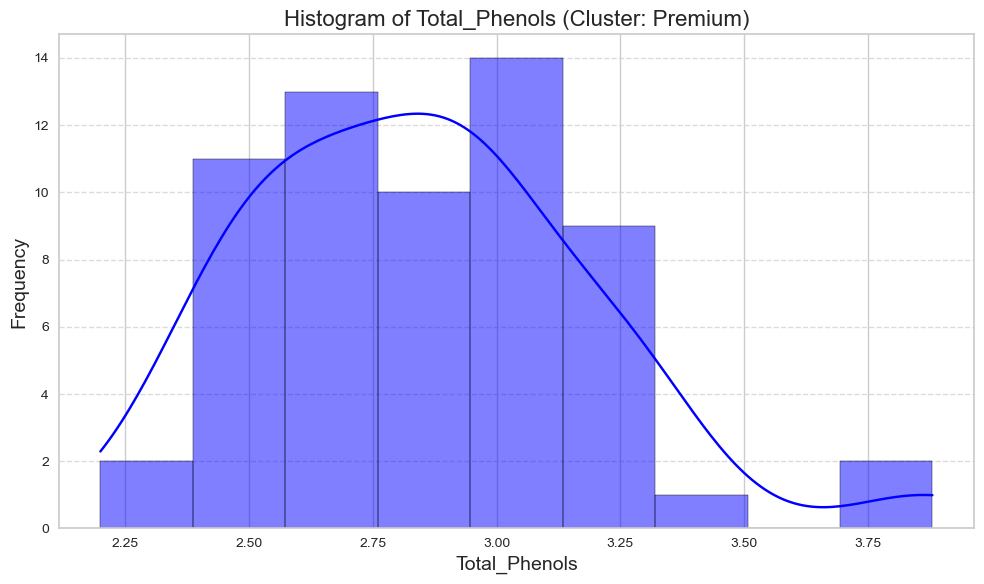

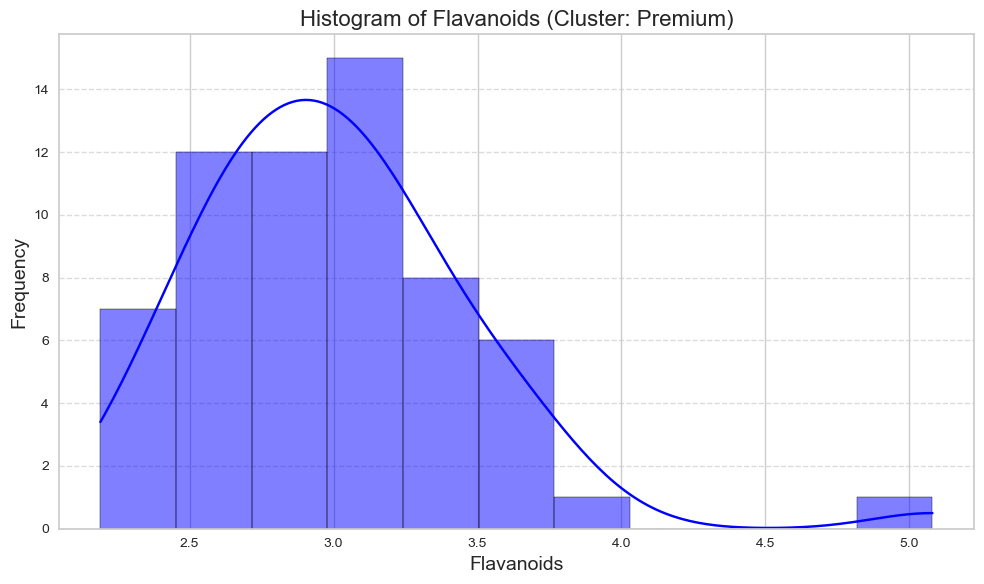

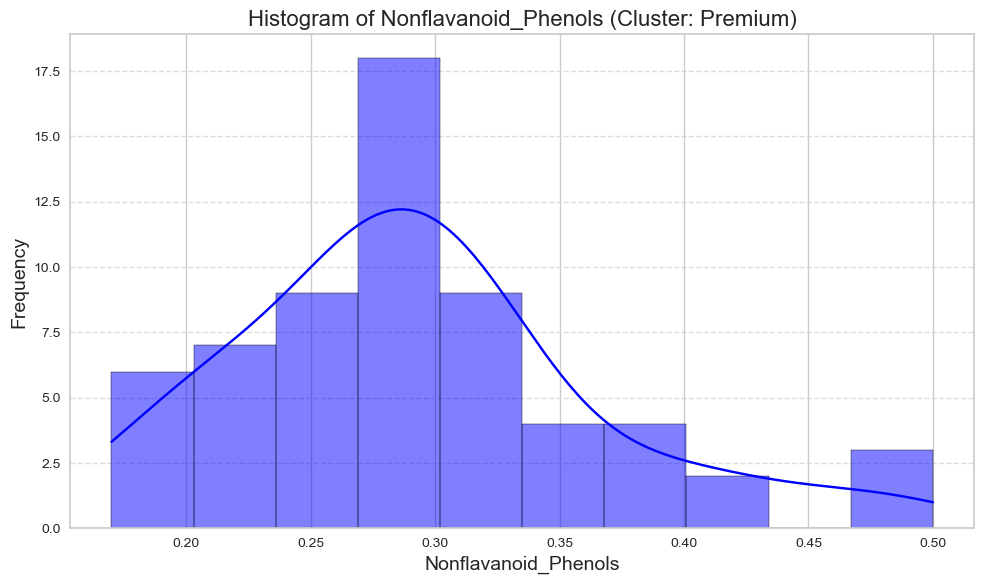

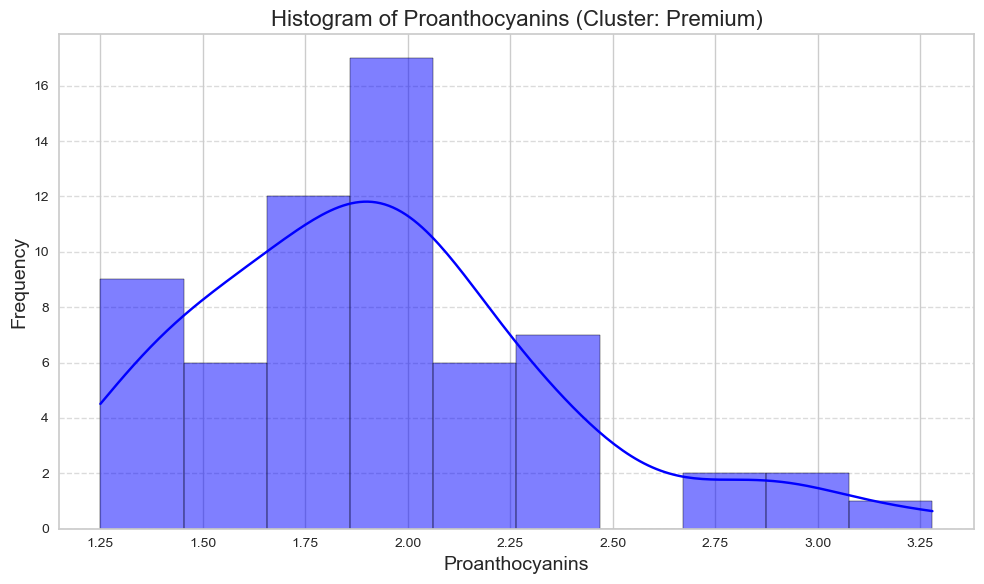

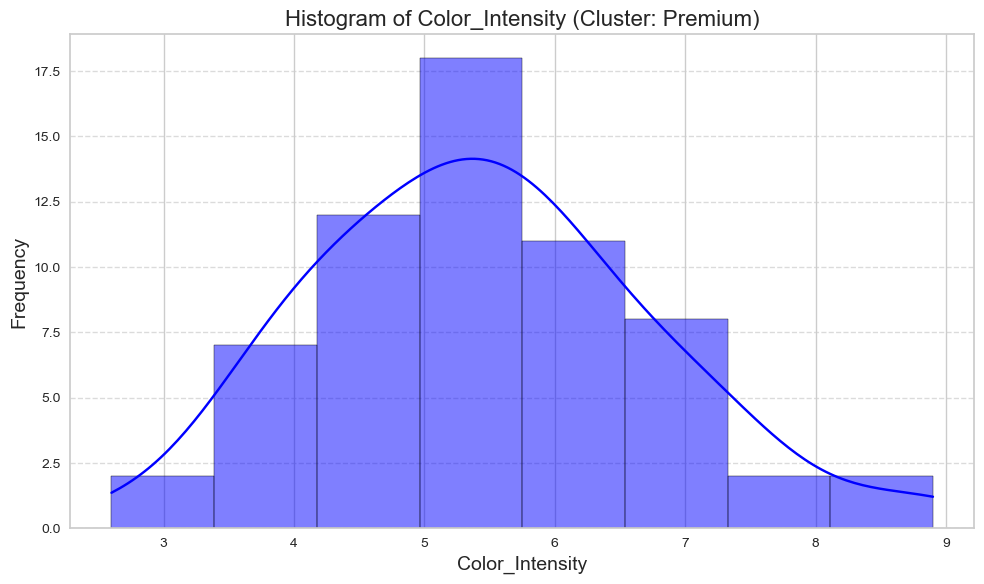

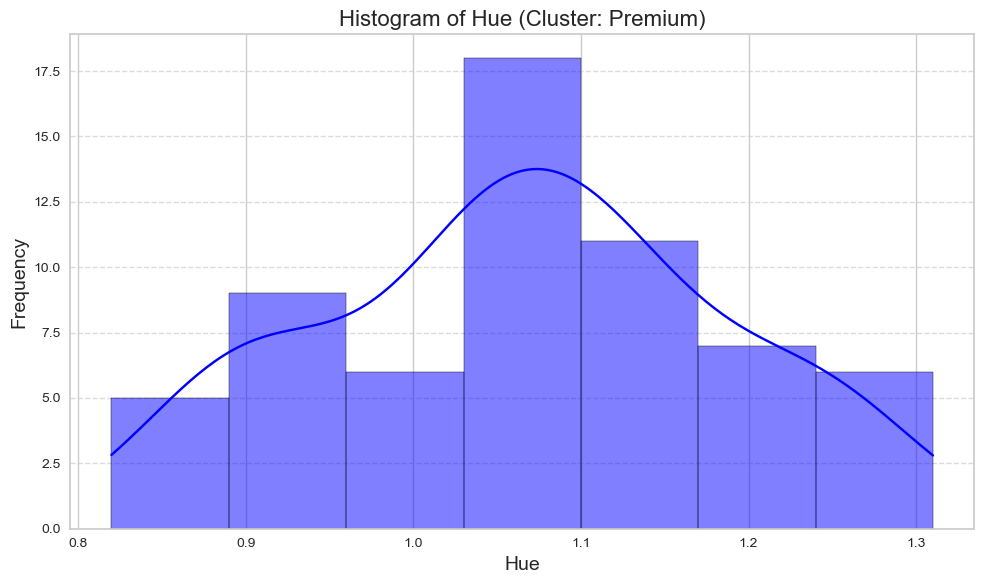

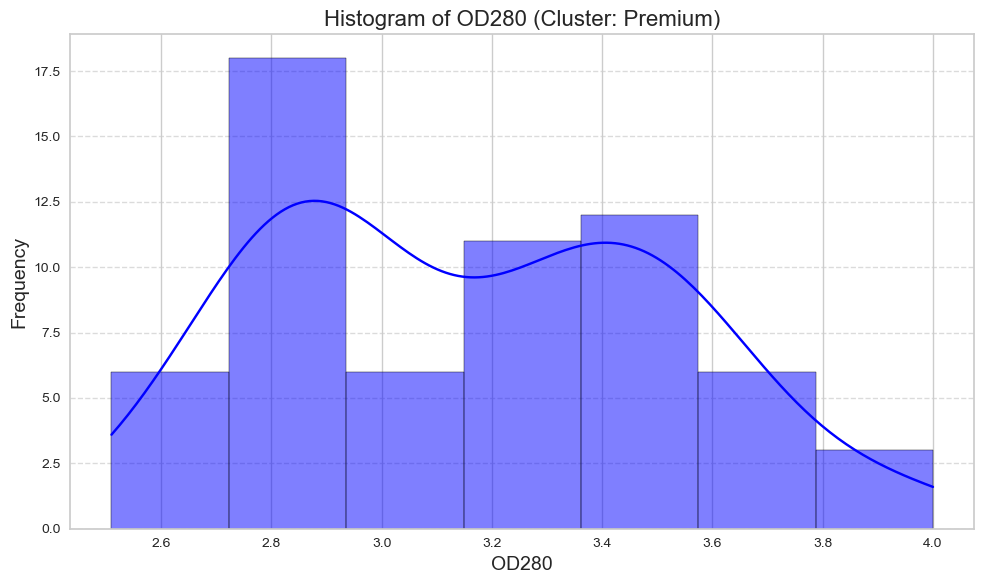

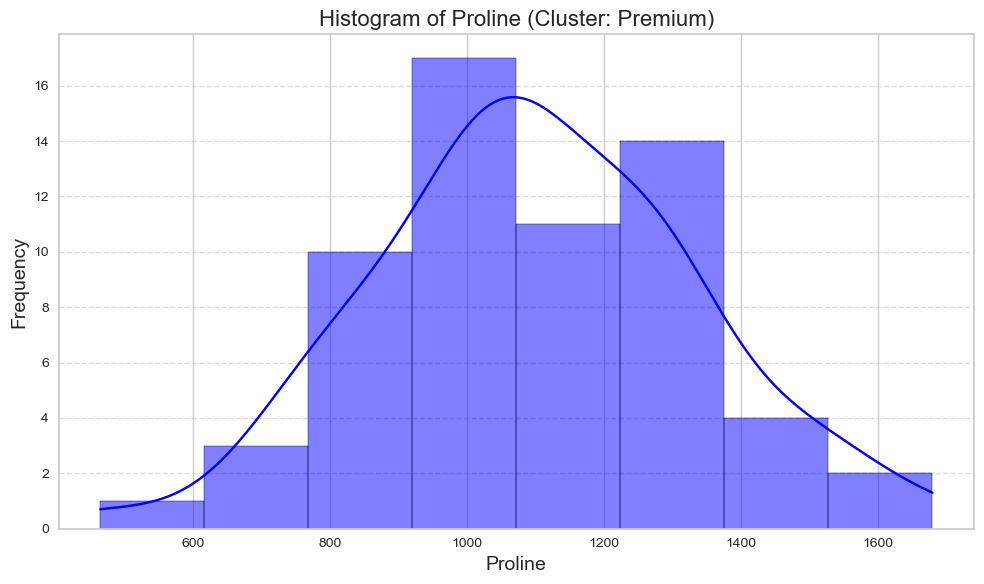

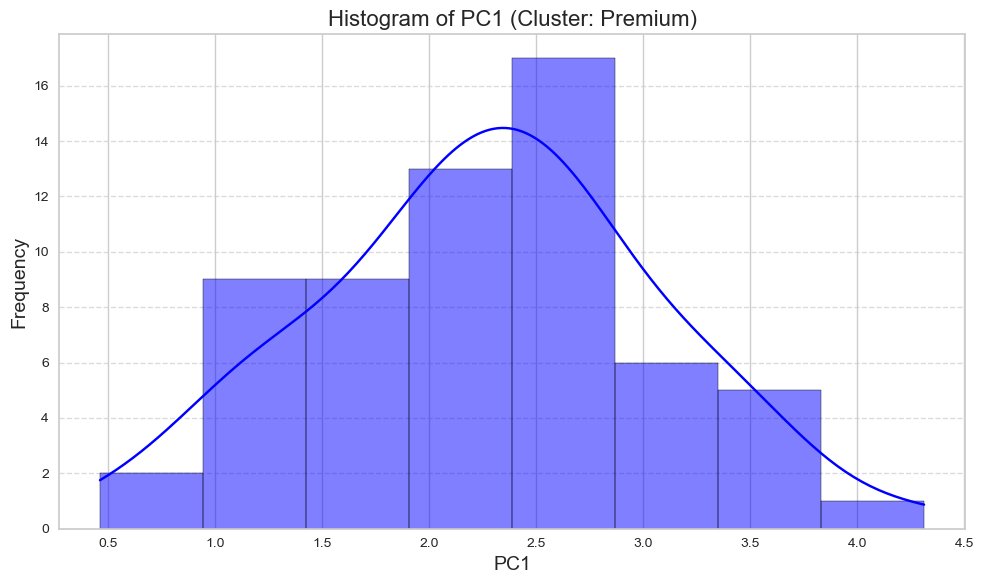

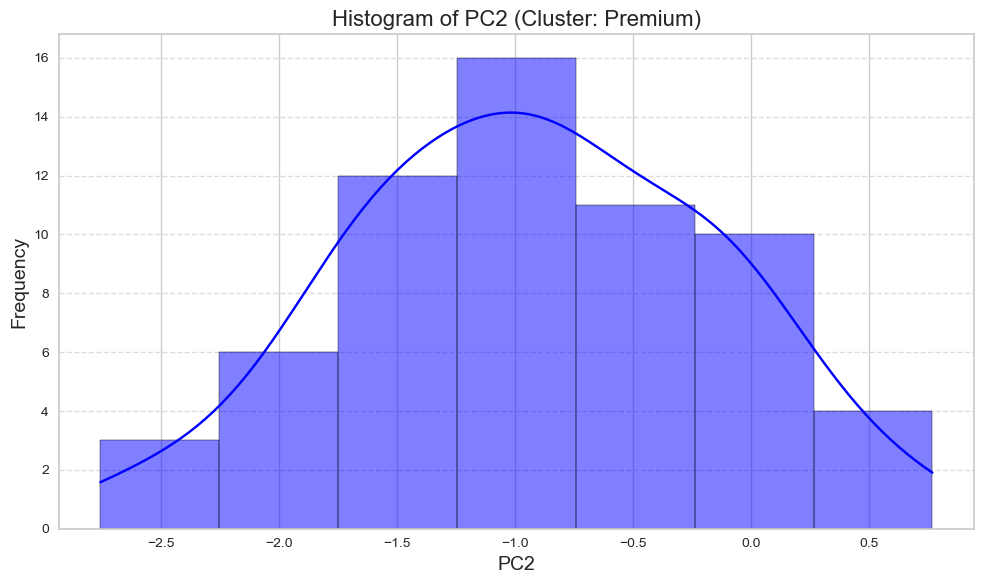

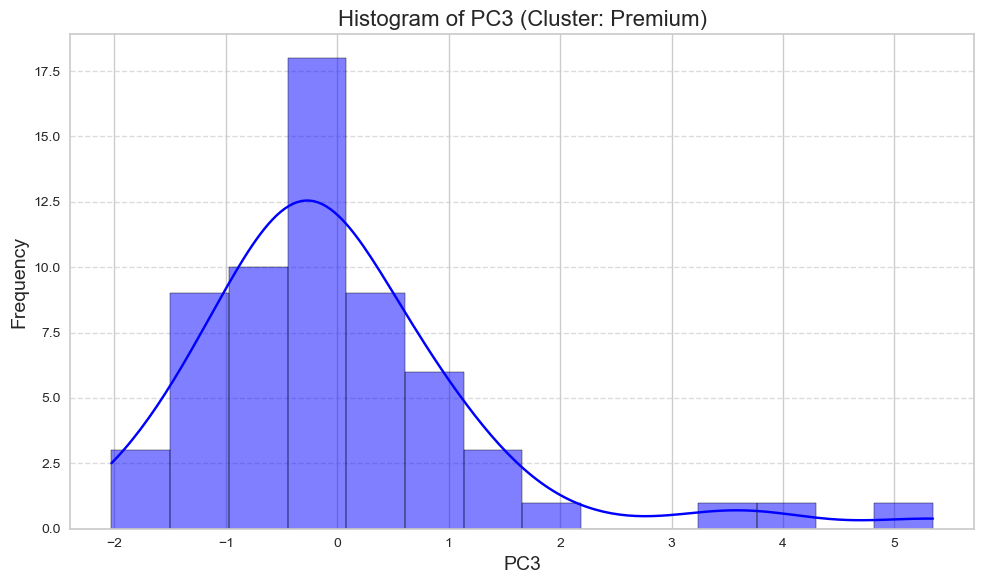

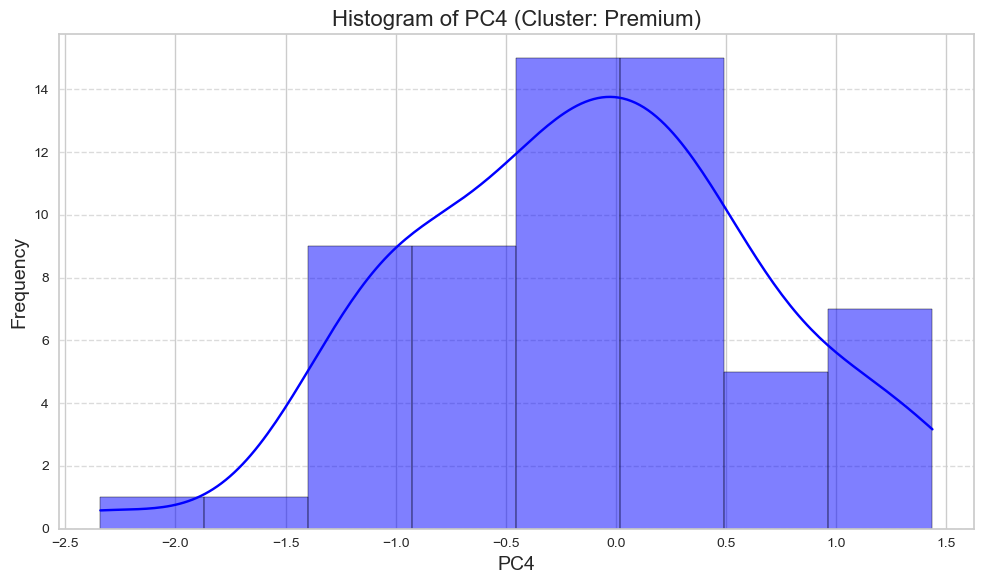

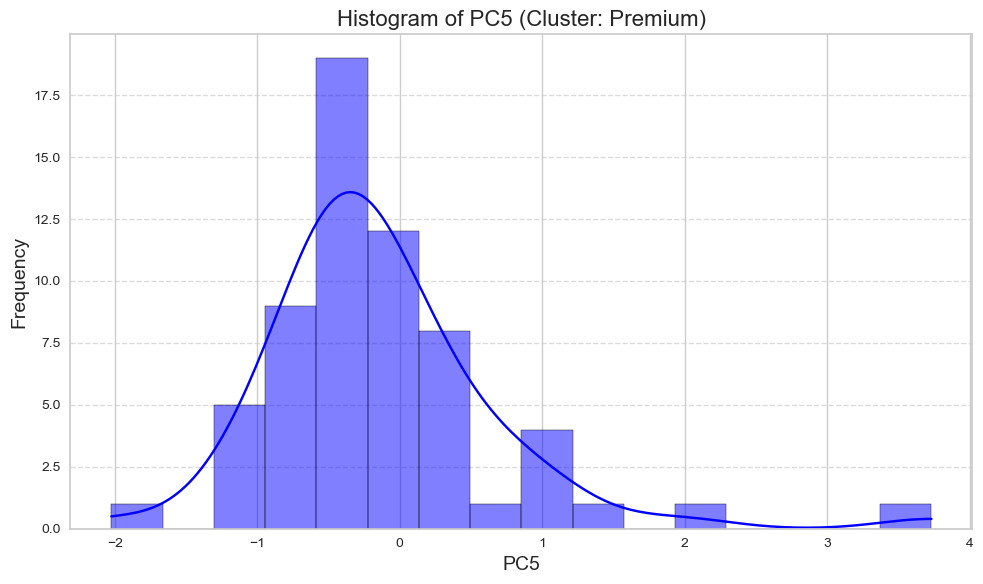

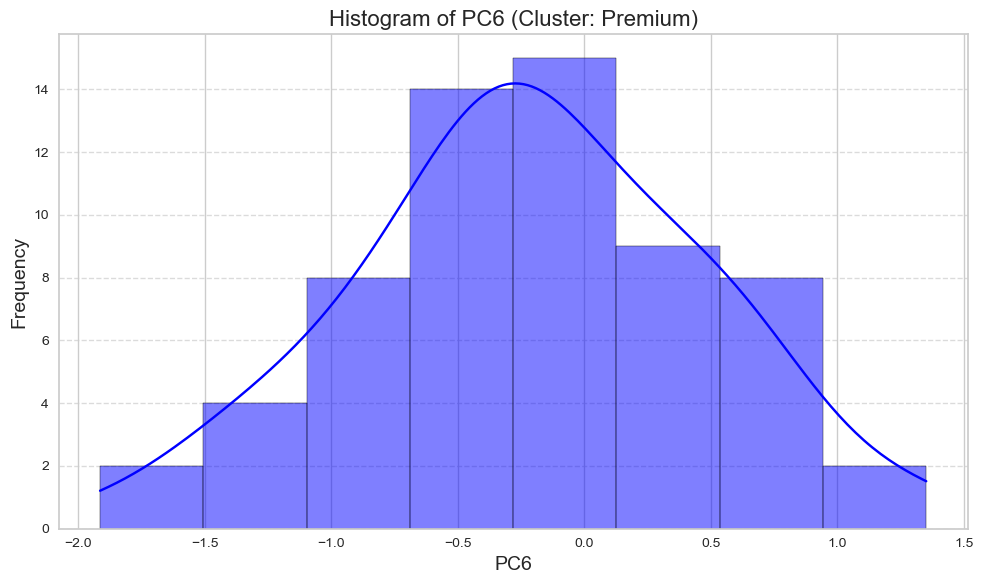

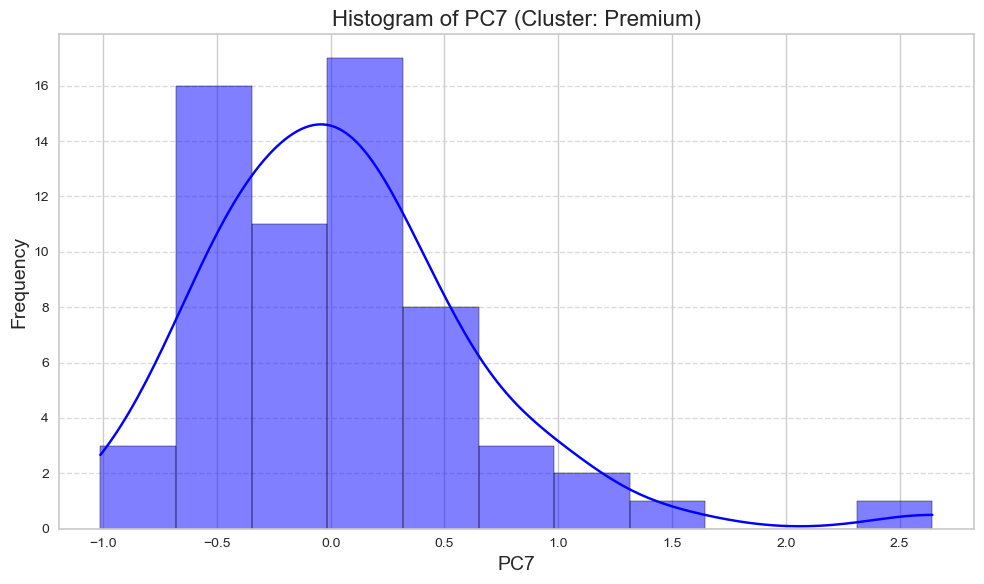

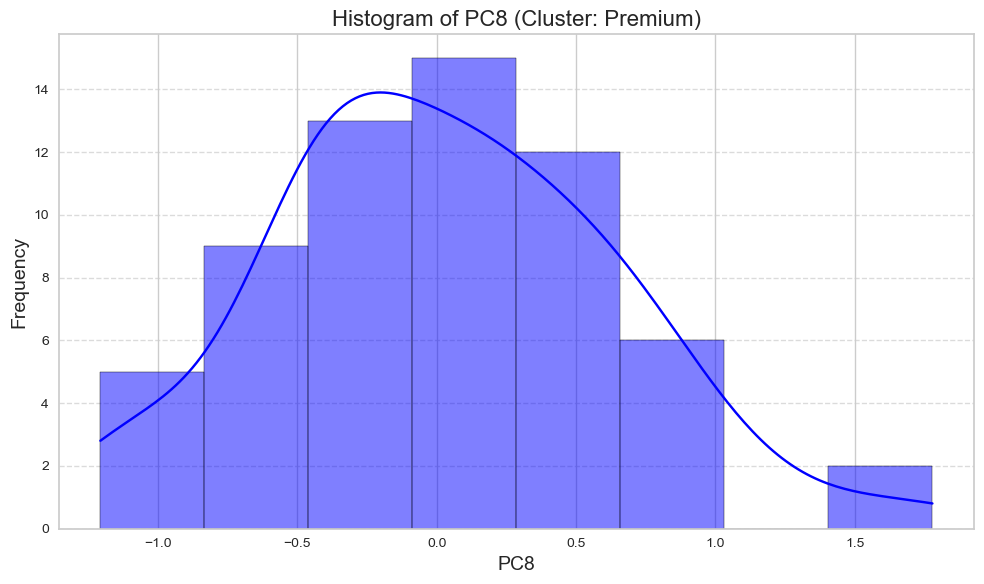

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for the "premium" cluster
premium_data = df[df["clusters"] == "premium"]

# Loop through all features (excluding 'clusters') and plot histograms
features = df.columns[:-1]  # Exclude the 'clusters' column

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for the current feature
    sns.histplot(
        data=premium_data,
        x=feature,
        kde=True,
        color="blue"
    )
    
    # Add labels and title
    plt.title(f'Histogram of {feature} (Cluster: Premium)', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [50]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'clusters'],
      dtype='object')

In [61]:
# Compute mean values of features for each cluster
cluster_summary = df.groupby('clusters').mean()
cluster_summary_median = df.groupby('clusters').median()
#print(df.groupby('clusters')['Hue'].mean())

# Display the summary statistics for clusters
print(cluster_summary)
print("###############################")
print(cluster_summary_median)

            Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
clusters                                                              
budget    12.250923    1.897385  2.231231     20.063077   92.738462   
normal    13.134118    3.307255  2.417647     21.241176   98.666667   
premium   13.676774    1.997903  2.466290     17.462903  107.967742   

          Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
clusters                                                                     
budget         2.247692    2.050000              0.357692         1.624154   
normal         1.683922    0.818824              0.451961         1.145882   
premium        2.847581    3.003226              0.292097         1.922097   

          Color_Intensity  ...     OD280      Proline       PC1       PC2  \
clusters                   ...                                              
budget           2.973077  ...  2.803385   510.169231 -0.036957  1.772239   
normal           7.234

<Figure size 1500x800 with 0 Axes>

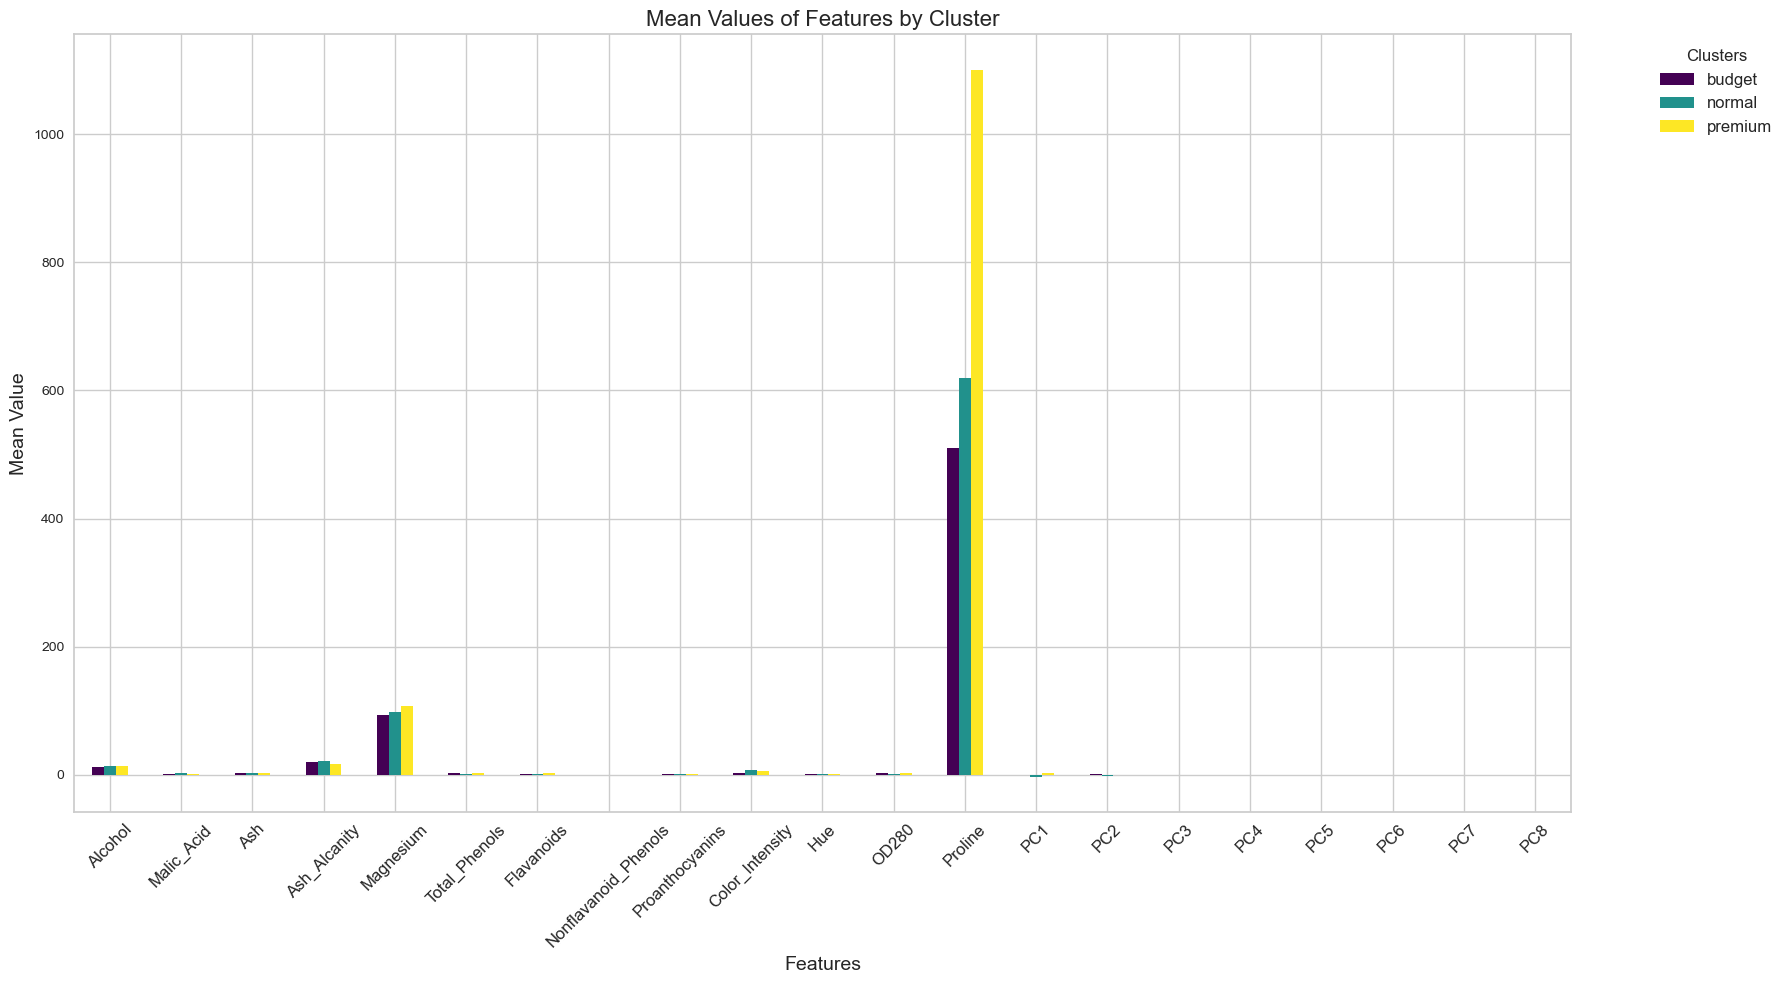

In [52]:
import matplotlib.pyplot as plt

# Transpose the cluster summary for easier visualization
cluster_summary_transposed = cluster_summary.T

# Plot the means of each feature by cluster
plt.figure(figsize=(15, 8))
cluster_summary_transposed.plot(kind='bar', figsize=(18, 10), colormap='viridis')
plt.title('Mean Values of Features by Cluster', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


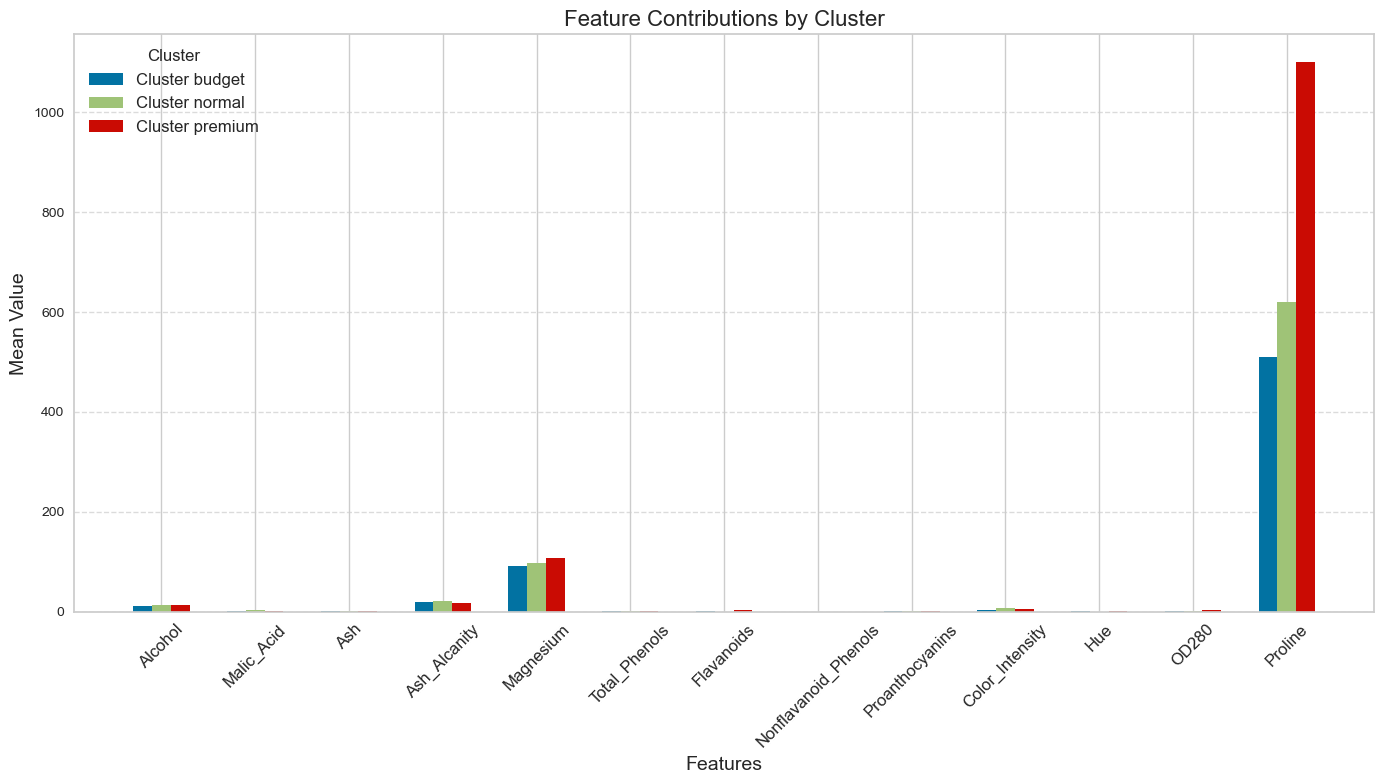

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Select only the first 13 columns of the cluster summary for plotting
cluster_summary_limited = cluster_summary.iloc[:, :13]

# Transpose for easier plotting (features as x-axis, clusters as hue)
cluster_summary_transposed = cluster_summary_limited.T

# Create grouped bar plot
features = cluster_summary_transposed.index
x = np.arange(len(features))  # The label locations
width = 0.2  # Width of each bar

plt.figure(figsize=(14, 8))

# Plot each cluster
for i, cluster in enumerate(cluster_summary_transposed.columns):
    plt.bar(x + i * width, cluster_summary_transposed[cluster], width, label=f'Cluster {cluster}')

# Add labels, title, and legend
plt.title('Feature Contributions by Cluster', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(x + width * (len(cluster_summary_transposed.columns) - 1) / 2, features, rotation=45, fontsize=12)
plt.legend(title='Cluster', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()



## Boxplots for visual comparsion

C:\Users\andre\AppData\Local\Temp\ipykernel_8592\1858590635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clusters', y=column, palette='viridis')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\1858590635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clusters', y=column, palette='viridis')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\1858590635.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clusters', y=column, palette='viridis')
C:\Users\andre\AppData\Local\Temp\ipykernel_8592\185859

ValueError: num must be an integer with 1 <= num <= 16, not 17

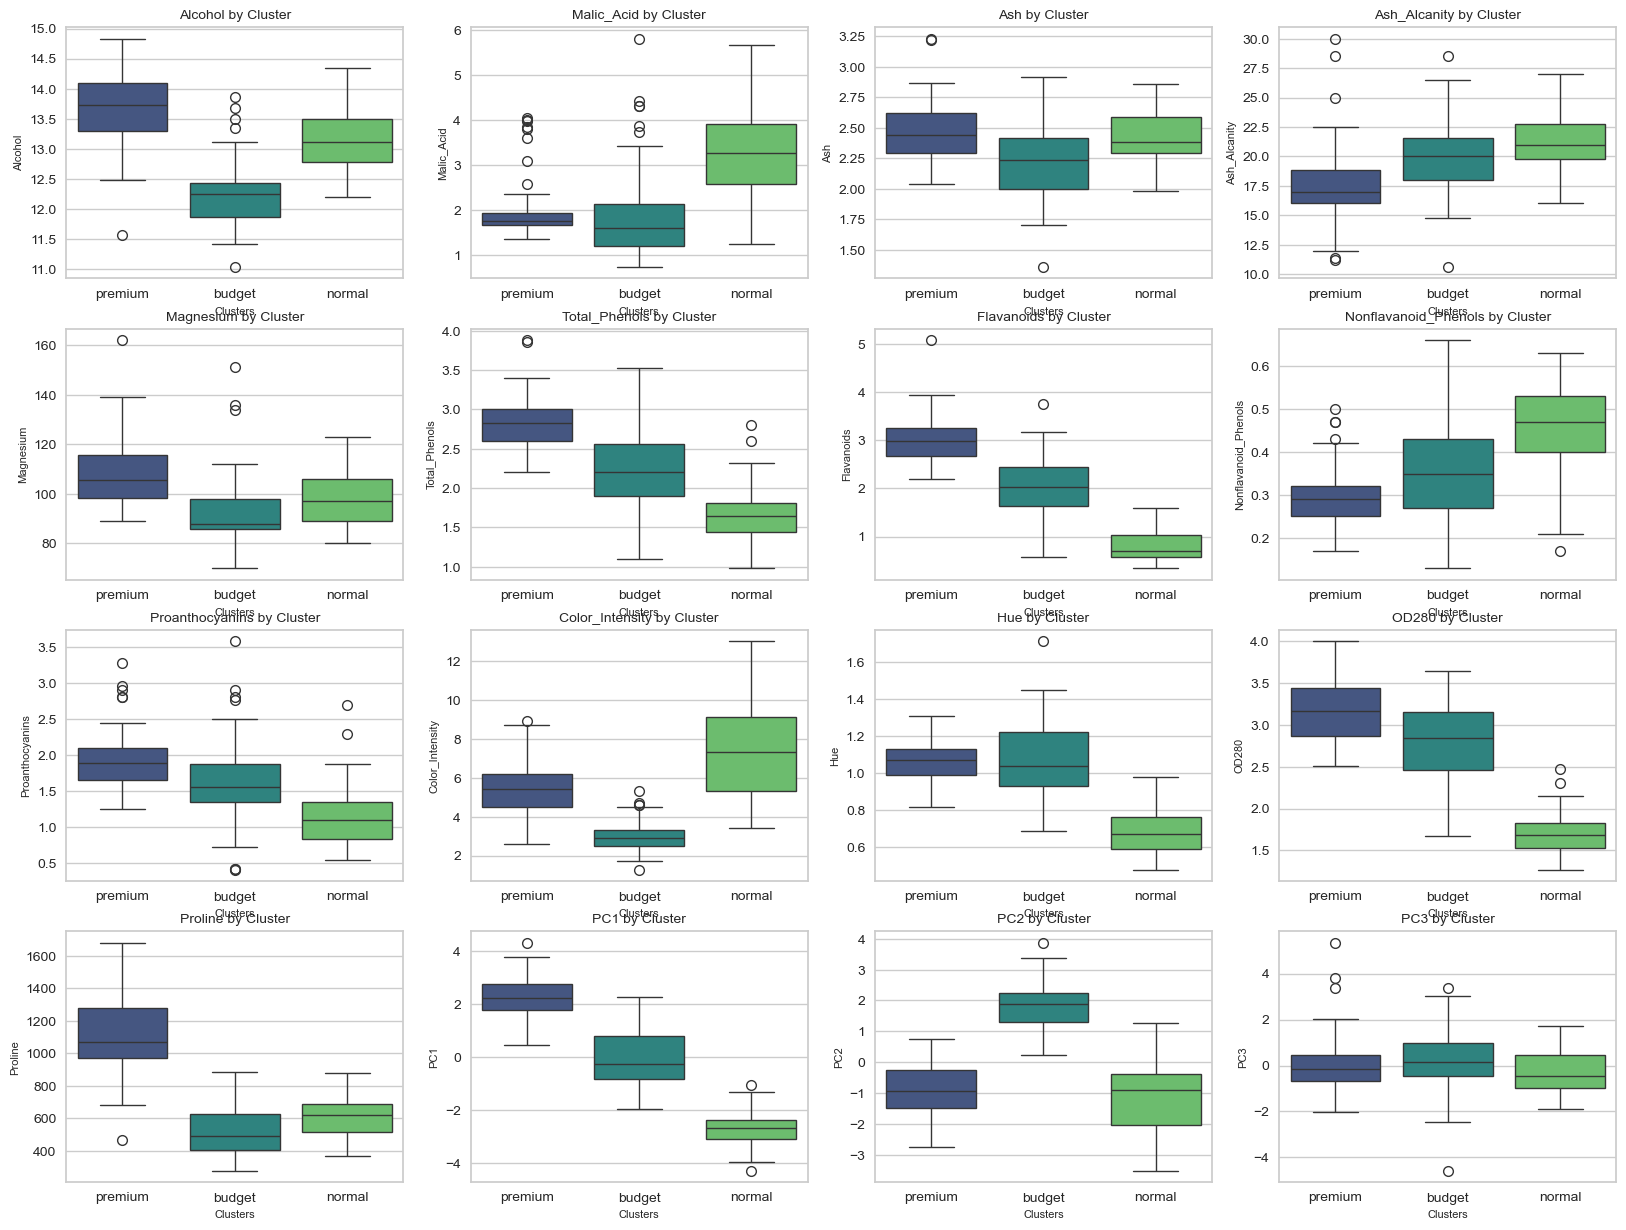

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each feature across clusters
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the 'Cluster' column
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='clusters', y=column, palette='viridis')
    plt.title(f'{column} by Cluster', fontsize=10)
    plt.xlabel('Clusters', fontsize=8)
    plt.ylabel(column, fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# Select only the first 13 columns of the DataFrame
pca_contributions = df.iloc[:, :13]  # First 13 columns

# Compute mean contributions for each cluster
cluster_contributions = df.groupby('clusters')[pca_contributions.columns].mean()

# Plot contributions of the first 13 features by cluster
cluster_contributions.T.plot(kind='bar', figsize=(12, 6), legend=True, cmap='tab10')
plt.title('Mean Contributions of Features by Cluster', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Contribution', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Extract feature contributions (loadings) for PCs
pca_contributions = df.iloc[:, :13]  # Assuming the PCs are the last columns before 'clusters'

# Compute mean contributions for each cluster
cluster_contributions = df.groupby('clusters')[pca_contributions.columns].mean()

# Plot contributions of PCs for each cluster
cluster_contributions.T.plot(kind='bar', figsize=(12, 6), legend=True, cmap='tab10')
plt.title('Mean Principal Component Contributions by Cluster', fontsize=16)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Mean Contribution', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Conclusion: Proline is an amino acid that naturally occurs in grapes and is an essential component in the wine-making process. It is commonly used as an indicator of grape variety and wine quality.

In the dataset, Proline is likely used as a distinguishing feature for clustering because:

    It varies significantly between grape varieties.
    Its levels are influenced by environmental factors and wine-making techniques.
    It can contribute to separating wines based on their sweetness, origin, or variety.

1. Statistical Analysis
a. Compare Means (ANOVA or t-tests)

    What to do: Use statistical tests to check if the mean of a feature differs significantly across clusters.
    How:
        For numerical features, perform one-way ANOVA (scipy.stats.f_oneway) or t-tests.
        For categorical features, use Chi-square tests.
    Why: Helps identify which features are most influential in separating clusters.

b. Boxplots for Visual Comparison

    What to do: Plot boxplots for each feature across clusters.
    How: Use seaborn.boxplot to visualize the distribution of each feature within clusters.
    Why: Quickly identify features with the greatest variation across clusters.

2. Feature Importance
a. Decision Trees or Random Forests

    What to do: Train a classifier (e.g., decision tree or random forest) using cluster labels as the target variable.
    How: Use the feature importances from the model to identify which features best differentiate clusters.
    Why: Provides a ranked list of important features based on their ability to predict cluster membership.

b. Feature Contribution in PCA

    What to do: Examine the contributions of features to principal components (as done earlier).
    How: Focus on features with high loadings for components that separate clusters.
    Why: Links clusters to specific dimensions of the data.

3. Cluster Profiling
a. Summarize Features

    What to do: Compute descriptive statistics (mean, median, standard deviation) for each feature within each cluster.
    How: Use groupby to aggregate statistics.
    Why: Helps create a "profile" for each cluster.

b. Compare Cluster Sizes

    What to do: Check the distribution of data points across clusters.
    How: Use value_counts on the cluster labels.
    Why: Identifies imbalances or outliers in the clustering.

4. Visualization
a. Parallel Coordinates Plot

    What to do: Visualize all features for each cluster in a single plot.
    How: Use pandas.plotting.parallel_coordinates.
    Why: Helps understand how clusters differ across multiple features simultaneously.

b. Pairplot for Key Features

    What to do: Create scatter plots of key feature pairs with clusters as the hue.
    How: Use seaborn.pairplot.
    Why: Identifies interactions and separations in multiple dimensions.

5. Cluster Validation
a. Silhouette Analysis

    What to do: Compute the silhouette score to assess the quality of clustering.
    How: Use sklearn.metrics.silhouette_score.
    Why: Determines how well-separated and compact the clusters are.

b. Check for Overlaps

    What to do: Identify if certain clusters overlap in specific features.
    How: Use scatter plots or density plots.
    Why: Understand boundaries and refine clustering if needed.




In [ ]:
What is Proline?

Proline is an amino acid that naturally occurs in grapes and is an essential component in the wine-making process. It is commonly used as an indicator of grape variety and wine quality.
Role of Proline in Wine

    Indicator of Grape Ripeness:
        Proline levels are correlated with the ripeness of grapes at the time of harvest.
        Higher levels suggest grapes that were exposed to more sunlight or were harvested later in the season.

    Sweetness and Flavor:
        Proline contributes to the overall sweetness and flavor profile of wine.
        Wines with higher proline content may exhibit richer and more complex taste notes.

    Fermentation:
        Proline is not readily utilized by yeast during fermentation, so it remains present in the wine after fermentation.
        This makes it a stable marker for distinguishing between different wines.

    Wine Authentication:
        Proline concentration is often used to differentiate between authentic wines and those that may have been adulterated.
        It also helps classify wines based on geographic origin or grape variety.

Significance in Clustering

In the dataset, Proline is likely used as a distinguishing feature for clustering because:

    It varies significantly between grape varieties.
    Its levels are influenced by environmental factors and wine-making techniques.
    It can contribute to separating wines based on their sweetness, origin, or variety.